In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_excel('Prediktif Penjualan Obat Tertentu Dari Tahun 2022.xlsx')
df.head()

ID TAGIHAN  ID KUNJUNGAN  ID PENJUALAN  ID TRANSAKSI  HARGA JUAL  \
0       15671          6919             7            15       309.4   
1          85          6952            14            32       518.7   
2         344          6986            22            59       344.5   
3         367          6964            27            79       344.5   
4        1089          6962            31            89       344.5   

              TGL JUAL  JAM JUAL  ID BARANG  \
0  2022-04-10 12:02:48        12       2850   
1  2022-04-10 12:16:16        12        437   
2  2022-04-10 12:25:00        12        439   
3  2022-04-10 12:32:13        12        439   
4  2022-04-10 12:37:14        12        439   

                                BARANG NAMA GOLONGAN  ...  \
0       SPIRONOLACTONE 25 MG TABLET "J    OBAT KERAS  ...   
1  CANDESARTAN 16 MG TABLET (HEXPHARM)    OBAT KERAS  ...   
2            CANDESARTAN 8 MG TABLET *    OBAT KERAS  ...   
3            CANDESARTAN 8 MG TABLET *    OBAT KERAS  ...   
4            CANDESARTAN 8 MG TABLET *    OBAT KERAS  ...   

                                     signa    signa_manual id_bmhp  \
0                                      x     1X1 TAB, PAGI    2850   
1  x -- Satuan Pakai -- -- Aturan Pakai --         2X1 TAB     437   
2  x -- Satuan Pakai -- -- Aturan Pakai --   1X1 TAB, PAGI     439   
3                                      x     1X1 TAB, PAGI     439   
4  x -- Satuan Pakai -- -- Aturan Pakai --  1X1 TAB, MALAM     439   

                                         dokter  \
0  dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   
1  dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   
2  dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   
3  dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   
4  dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   

                           dokter_penulis_resep  TANGGAL JUAL  \
0  dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-10   
1  dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-10   
2  dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-10   
3  dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-10   
4  dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-10   

  TOTAL HARGA JUAL TOTAL HARGA POKOK HARGA_POKOK HARGA_JUAL  
0          10520.0                 0           0      309.0  
1          35272.0                 0           0      519.0  
2          11713.0                 0           0      344.0  
3          11713.0                 0           0      344.0  
4          11713.0                 0           0      344.0  

[5 rows x 48 columns]

#Menggunakan Metode XgBoost

In [ ]:
unique_obat = df['BARANG'].unique()
print(unique_obat)

['SPIRONOLACTONE 25 MG TABLET "J' 'CANDESARTAN 16 MG TABLET (HEXPHARM)'
 'CANDESARTAN 8 MG TABLET *' 'GLIQUIDONE 30 MG TABLET (DEXA)'
 'CANDESARTAN 16 MG TABLET (DEXA)' 'CANDESARTAN 8 MG TABLET (DEXA)'
 'SPIRONOLACTONE 25 MG TABLET (DEXA)' 'RYZODEG FLEXTOUCH'
 'AMITRIPTYLINE 25 MG TABLET SS (YARINDO)'
 'AMITRIPTYLINE 25 MG TABLET SS (INAF)' 'GLIQUIDONE 30 MG TABLET  *'
 'SPIRONOLACTONE 100 MG TABLET (OTTO)'
 'SPIRONOLACTONE 100 MG TABLET (DEXA)' 'INSULIN RYZODEG FLEXTOUCH']


In [ ]:
# Filter DataFrame berdasarkan kata 'SPIRONOLACTONE' di kolom 'BARANG'
df_spironol = df[df['BARANG'].str.contains('SPIRONOLACTONE', case=False)]
df_cand = df[df['BARANG'].str.contains('CANDESARTAN', case=False)]
df_ryz = df[df['BARANG'].str.contains('RYZODEG', case=False)]
df_ami = df[df['BARANG'].str.contains('AMITRIPTYLINE', case=False)]
df_gli = df[df['BARANG'].str.contains('GLIQUIDONE', case=False)]

# Tampilkan DataFrame baru
df_spironol.head()

ID TAGIHAN  ID KUNJUNGAN  ID PENJUALAN  ID TRANSAKSI  HARGA JUAL  \
0        15671          6919             7            15       309.4   
8           84          7011            39           116       309.4   
16        3447         13878          9835         23831       297.5   
34        6744         14037         10123         24391       238.0   
48        6211         14034         10289         24763         NaN   

               TGL JUAL  JAM JUAL  ID BARANG  \
0   2022-04-10 12:02:48        12       2850   
8   2022-04-10 12:45:43        12       2850   
16  2022-04-19 11:17:00        11       2849   
34  2022-04-19 13:34:00        13       2849   
48  2022-04-19 14:44:07        14       2849   

                                BARANG NAMA GOLONGAN  ...  \
0       SPIRONOLACTONE 25 MG TABLET "J    OBAT KERAS  ...   
8       SPIRONOLACTONE 25 MG TABLET "J    OBAT KERAS  ...   
16  SPIRONOLACTONE 25 MG TABLET (DEXA)    OBAT KERAS  ...   
34  SPIRONOLACTONE 25 MG TABLET (DEXA)    OBAT KERAS  ...   
48  SPIRONOLACTONE 25 MG TABLET (DEXA)    OBAT KERAS  ...   

                            signa   signa_manual id_bmhp  \
0                             x    1X1 TAB, PAGI    2850   
8                             x    1X1 TAB, PAGI    2850   
16         x Tablet setelah makan     1x1 tablet    2849   
34  x Tablet sesudah makan (pagi)            NaN    2849   
48         x Tablet setelah makan  1X1 TAB, PAGI    2849   

                                          dokter  \
0   dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   
8   dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   
16                  dr. Mochamad Riski Kurniardi   
34               dr. Lola Ginawati, SpPD,FINASIM   
48  dr. Ayu Ariestha Kesumaningputri, SpJP, FIHA   

                            dokter_penulis_resep  TANGGAL JUAL  \
0   dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-10   
8   dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-10   
16                                           NaN    2022-04-19   
34               dr. Lola Ginawati, SpPD,FINASIM    2022-04-19   
48  dr. Ayu Ariestha Kesumaningputri, Sp.JP,FIHA    2022-04-19   

   TOTAL HARGA JUAL TOTAL HARGA POKOK HARGA_POKOK HARGA_JUAL  
0           10520.0                 0           0      309.0  
8           10520.0                 0           0      309.0  
16            892.0                 0           0      298.0  
34           1190.0                 0           0      238.0  
48              NaN                 0           0        NaN  

[5 rows x 48 columns]

In [ ]:
dfa = df[['TGL JUAL', 'QTY']]

In [ ]:
dfb = dfa.copy()

In [ ]:
dfb = dfb.set_index('TGL JUAL')
dfb.index = pd.to_datetime(dfb.index)

In [ ]:
dfb.head()

QTY
TGL JUAL                 
2022-04-10 12:02:48  34.0
2022-04-10 12:16:16  68.0
2022-04-10 12:25:00  34.0
2022-04-10 12:32:13  34.0
2022-04-10 12:37:14  34.0

In [ ]:
dfb.isnull().sum()

QTY    0
dtype: int64

In [ ]:
dfb = dfb.resample('D').sum()
print(dfb.head())

              QTY
TGL JUAL         
2022-04-10  340.0
2022-04-11    0.0
2022-04-12    0.0
2022-04-13    0.0
2022-04-14    0.0


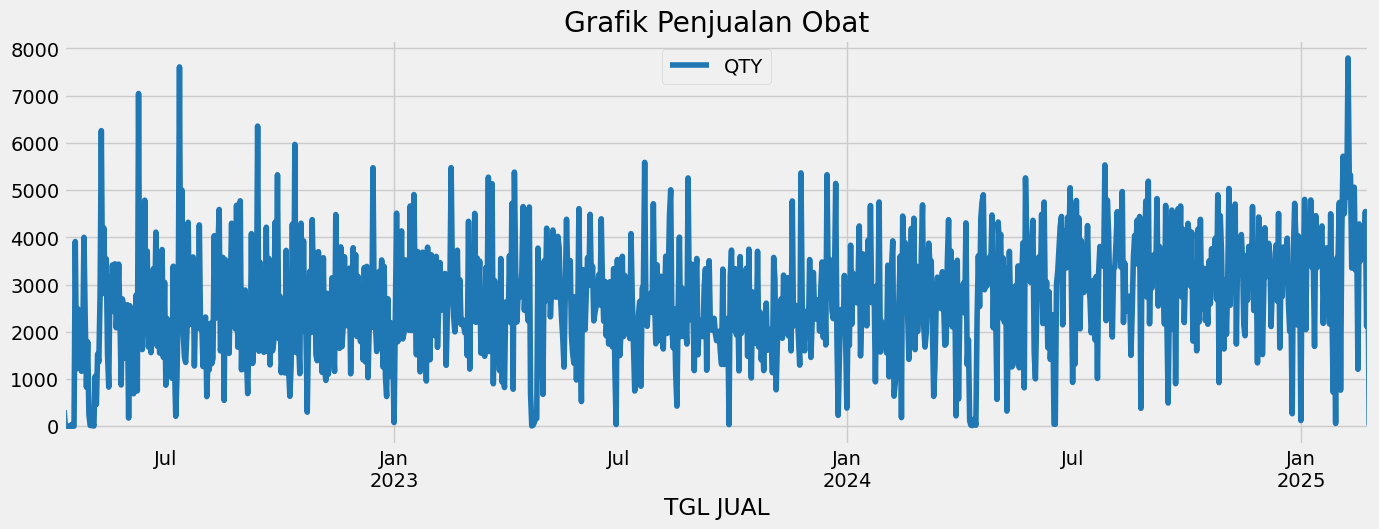

In [ ]:
dfb.plot(style='-',
        figsize=(15, 5),
        color=color_pal[0],
        title='Grafik Penjualan Obat')
plt.show()

<Axes: ylabel='Frequency'>

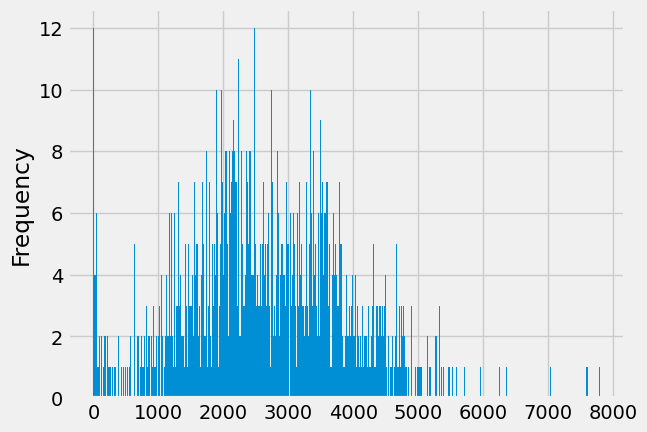

In [ ]:
dfb['QTY'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}, xlabel='TGL JUAL'>

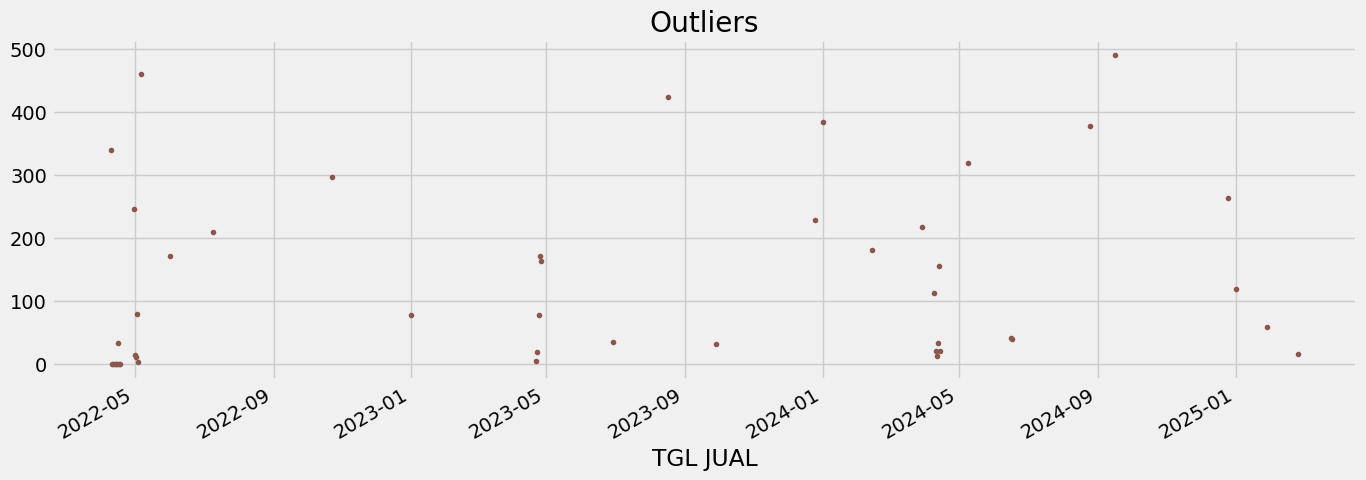

In [ ]:
dfb.query('QTY < 500')['QTY'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

<Axes: title={'center': 'Outliers'}, xlabel='TGL JUAL'>

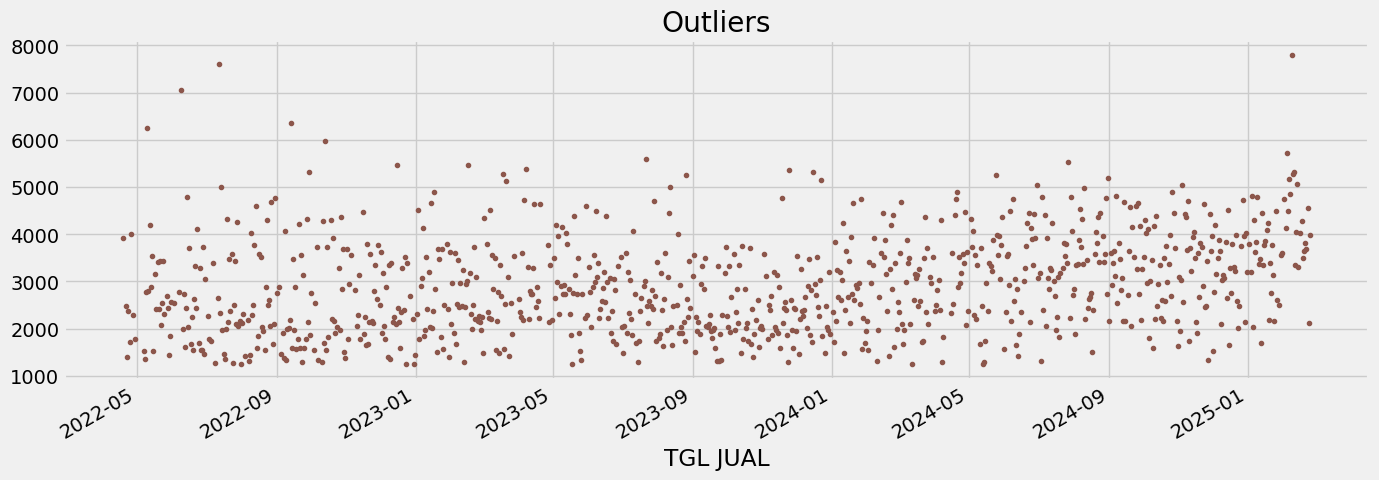

In [ ]:
dfb.query('QTY > 1250')['QTY'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [ ]:
dfb = dfb.query('QTY > 1000').copy()
dfb = dfb.query('QTY < 5000')

In [ ]:
dfc = dfb.copy()

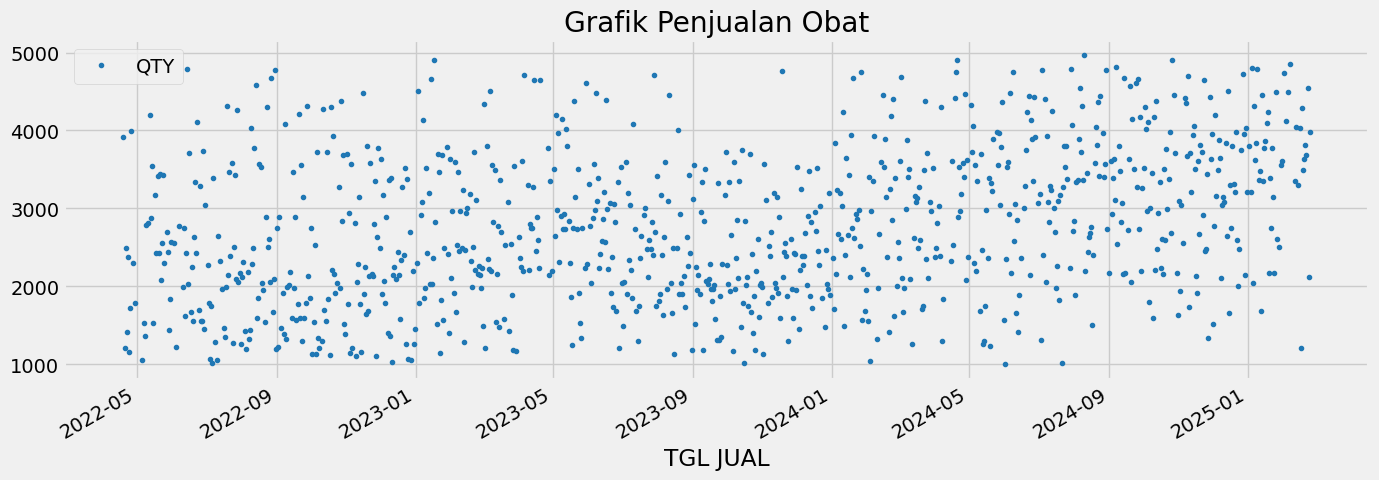

In [ ]:
dfc.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Grafik Penjualan Obat')
plt.show()

<Axes: ylabel='Frequency'>

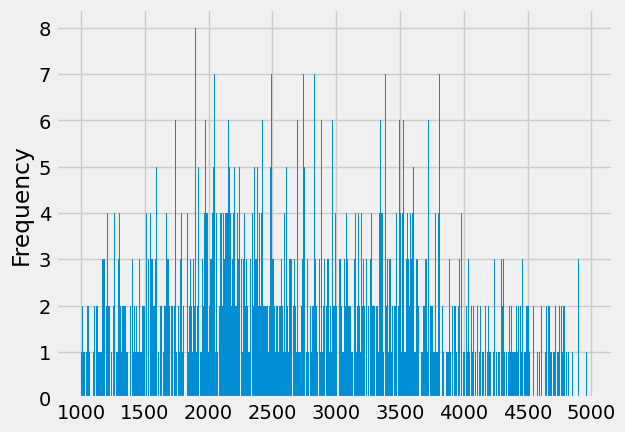

In [ ]:
dfc['QTY'].plot(kind='hist', bins=500)

In [ ]:
dfc.QTY.describe()

count     940.000000
mean     2761.227128
std       961.079163
min      1002.000000
25%      2024.250000
50%      2672.000000
75%      3501.250000
max      4969.000000
Name: QTY, dtype: float64

In [ ]:
# train = dfc.loc[dfc.index < '01-01-2025']
# test = dfc.loc[dfc.index >= '01-01-2025']

# fig, ax = plt.subplots(figsize=(15, 5))
# train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
# test.plot(ax=ax, label='Test Set')
# ax.axvline('01-01-2025', color='black', ls='--')
# ax.legend(['Training Set', 'Test Set'])
# plt.show()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=2, test_size=30)
dfc = dfc.sort_index()

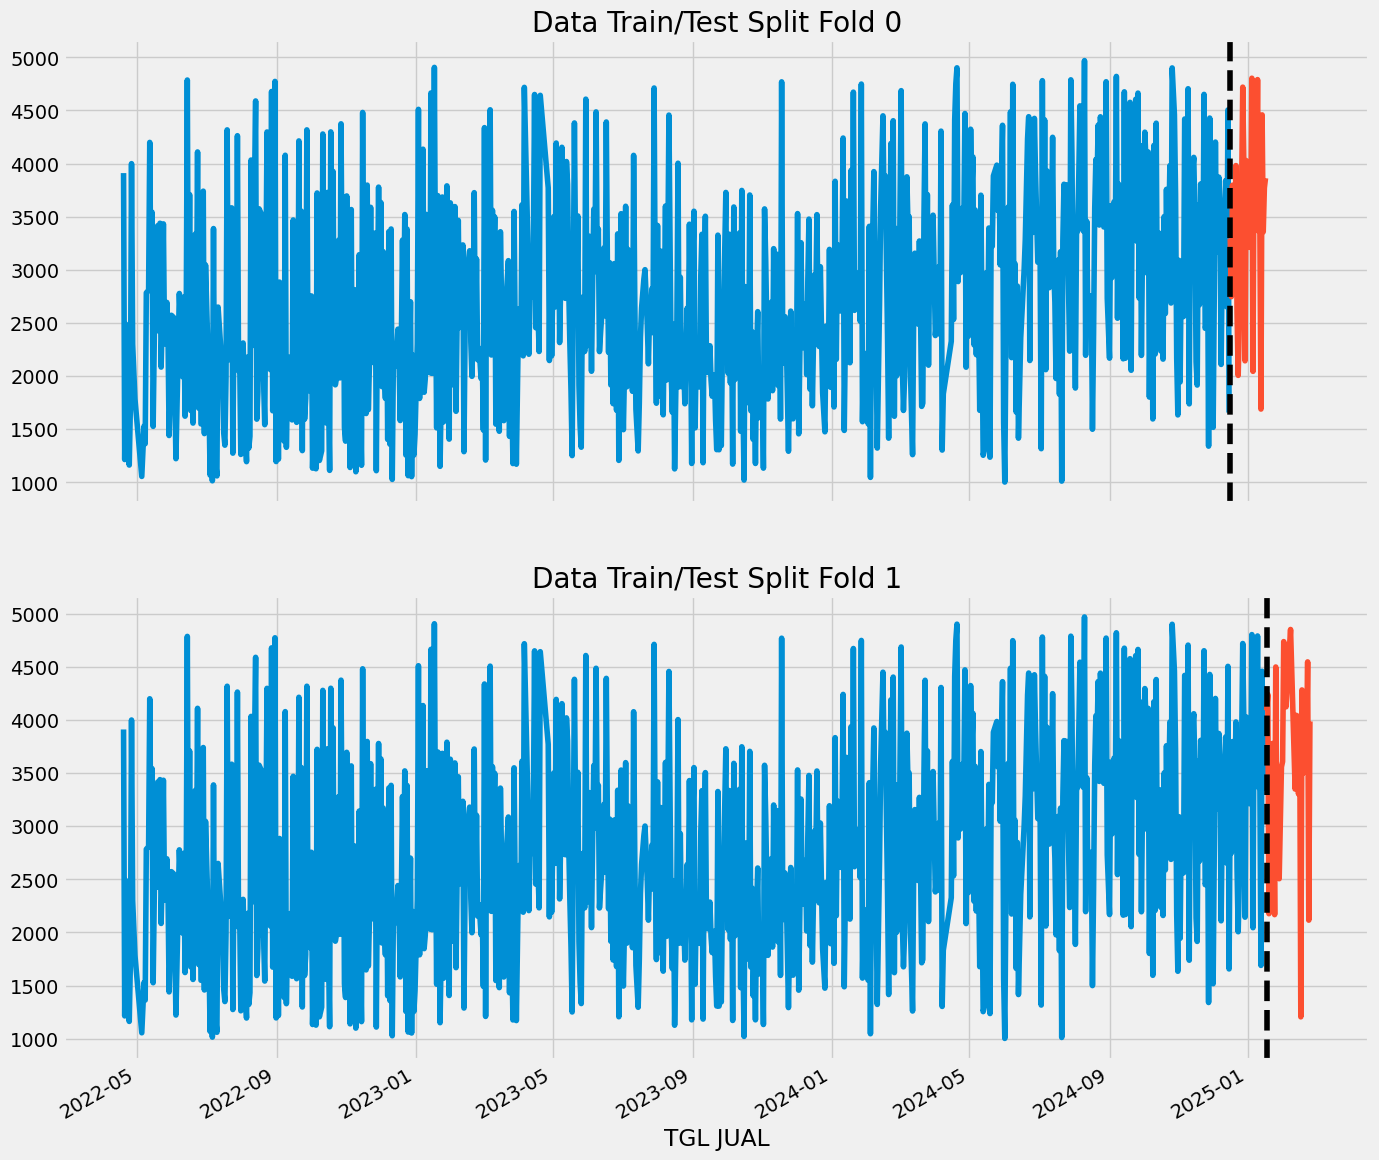

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(dfc):
    train = dfc.iloc[train_idx]
    test = dfc.iloc[val_idx]
    train['QTY'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['QTY'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [ ]:
def create_features(dfc):
    """
    Create time series features based on time series index.
    """
    dfc = dfc.copy()
    # dfc['hour'] = dfc.index.hour
    dfc['dayofweek'] = dfc.index.dayofweek
    # dfc['rolling_mean_7'] = dfc['QTY'].rolling(7).quantile(0.25)
    # dfc['rolling_mean_30'] = dfc['QTY'].rolling(7).quantile(0.75)
    # dfc['spike'] = (dfc['QTY'] > dfc['rolling_mean_7'] * 0.75).astype(int)
    dfc['quarter'] = dfc.index.quarter
    dfc['month'] = dfc.index.month
    dfc['year'] = dfc.index.year
    dfc['dayofyear'] = dfc.index.dayofyear
    dfc['dayofmonth'] = dfc.index.day
    dfc['weekofyear'] = dfc.index.isocalendar().week
    return dfc

dfc = create_features(dfc)

In [ ]:
from dateutil.relativedelta import relativedelta

def add_lags(dfc):
    target_map = dfc['QTY'].to_dict()
    dfc['lag1'] = dfc.index.map(lambda x: target_map.get(x - relativedelta(weeks=4), np.nan))
    dfc['lag2'] = dfc.index.map(lambda x: target_map.get(x - relativedelta(weeks=8), np.nan))
    dfc['lag3'] = dfc.index.map(lambda x: target_map.get(x - relativedelta(weeks=12), np.nan))
    # dfc['lag4'] = dfc.index.map(lambda x: target_map.get(x - relativedelta(weeks=24), np.nan))
    # dfc['lag5'] = dfc.index.map(lambda x: target_map.get(x - relativedelta(weeks=50), np.nan))
    # dfc['diff_lag7'] = dfc.index.map(lambda x: target_map.get(x - relativedelta(days=7), np.nan)) - dfc.index.map(lambda x: target_map.get(x, np.nan))
    # dfc['diff_lag1'] = dfc.index.map(lambda x: target_map.get(x - relativedelta(days=1), np.nan)) - dfc.index.map(lambda x: target_map.get(x, np.nan))
    return dfc

In [ ]:
dfc.head()

QTY  dayofweek  quarter  month  year  dayofyear  dayofmonth  \
TGL JUAL                                                                     
2022-04-19  3910.0          1        2      4  2022        109          19   
2022-04-20  1214.0          2        2      4  2022        110          20   
2022-04-21  2488.0          3        2      4  2022        111          21   
2022-04-22  1410.0          4        2      4  2022        112          22   
2022-04-23  2374.0          5        2      4  2022        113          23   

            weekofyear  
TGL JUAL                
2022-04-19          16  
2022-04-20          16  
2022-04-21          16  
2022-04-22          16  
2022-04-23          16

In [ ]:
dfc = add_lags(dfc)

In [ ]:
dfc = dfc.sort_index(ascending=False)

In [ ]:
dfg = dfc.copy()

In [ ]:
# dfd = dfd.fillna(0)

In [ ]:
# dfc.head(40)

In [ ]:
dfc = dfc.sort_index()


fold = 0
preds = []
scores = []
actuals = [] # To store actual values for plotting
for train_idx, val_idx in tss.split(dfc):
    train = dfc.iloc[train_idx]
    test = dfc.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'QTY'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]
    actuals.append(y_test) #add actuals to list


    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:2845.11505	validation_1-rmse:3518.24607
[100]	validation_0-rmse:1274.44010	validation_1-rmse:1612.88862
[200]	validation_0-rmse:827.82600	validation_1-rmse:994.75452


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:52] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:725.47695	validation_1-rmse:845.00139
[400]	validation_0-rmse:697.06585	validation_1-rmse:777.65013
[500]	validation_0-rmse:679.00737	validation_1-rmse:737.02023
[600]	validation_0-rmse:661.35228	validation_1-rmse:733.32183
[648]	validation_0-rmse:652.93843	validation_1-rmse:735.94156
[0]	validation_0-rmse:2869.68973	validation_1-rmse:3614.32391
[100]	validation_0-rmse:1281.13887	validation_1-rmse:1694.36971
[200]	validation_0-rmse:829.37256	validation_1-rmse:1052.23724


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:55:53] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:727.06621	validation_1-rmse:865.52215
[400]	validation_0-rmse:697.18632	validation_1-rmse:834.78666
[448]	validation_0-rmse:687.99123	validation_1-rmse:836.39116


In [ ]:
dfc.index.max()

Timestamp('2025-02-24 00:00:00')

In [ ]:
# Create future dataframe
future = pd.date_range('2025-02-25','2026-02-23', freq='1d')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
dfc['isFuture'] = False

In [ ]:
future_df.head()

isFuture
2025-02-25      True
2025-02-26      True
2025-02-27      True
2025-02-28      True
2025-03-01      True

In [ ]:
df_and_future = pd.concat([dfc, future_df])
df_and_future = create_features(df_and_future)
df_and_future = add_lags(df_and_future)

In [ ]:
future_w_features = df_and_future.query('isFuture').copy()

In [ ]:
future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

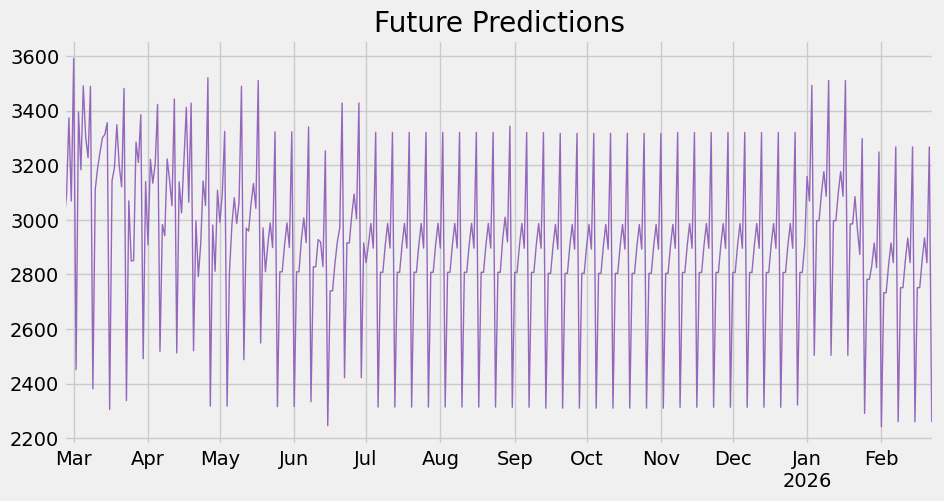

In [ ]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

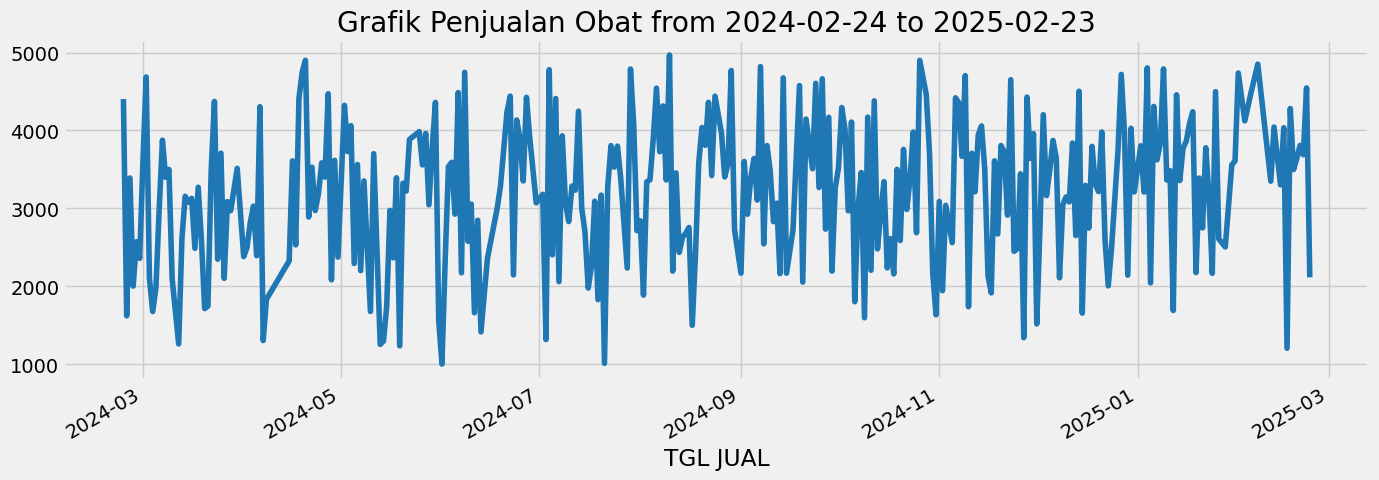

In [ ]:
start_date = '2024-02-24'
end_date = '2025-02-23'

# Filter the DataFrame based on the date range
df_filtered = dfc[(dfc.index >= start_date) & (dfc.index <= end_date)]

# Plot the 'QTY' column
df_filtered['QTY'].plot(figsize=(15, 5),
                        color=color_pal[0],
                        title='Grafik Penjualan Obat from 2024-02-24 to 2025-02-23')
plt.show()

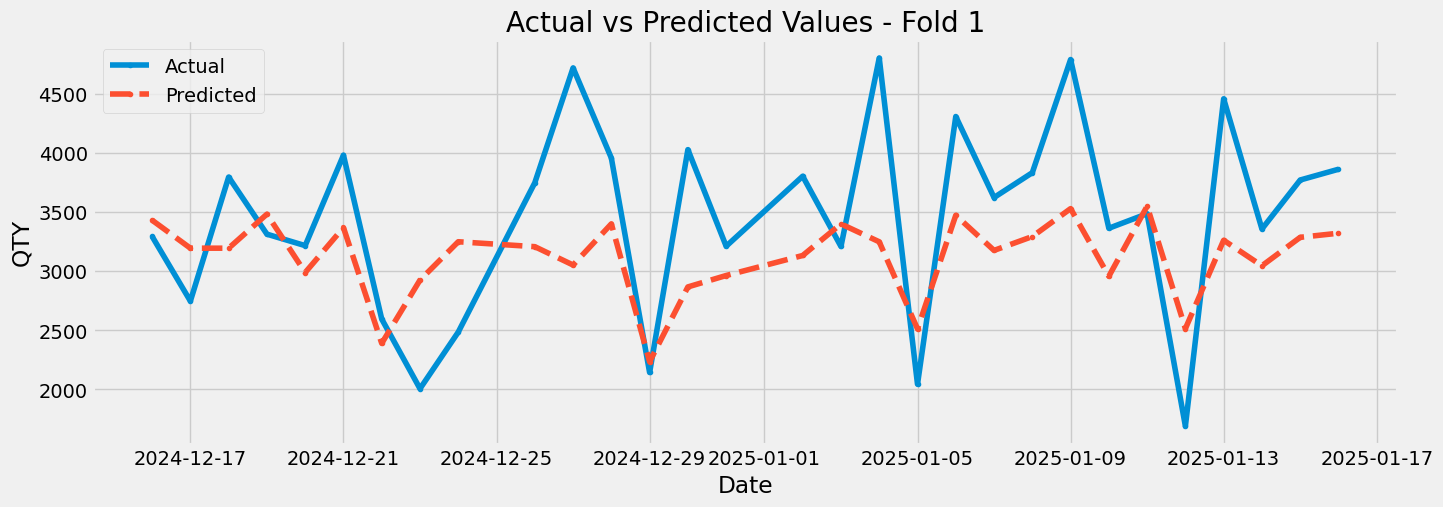

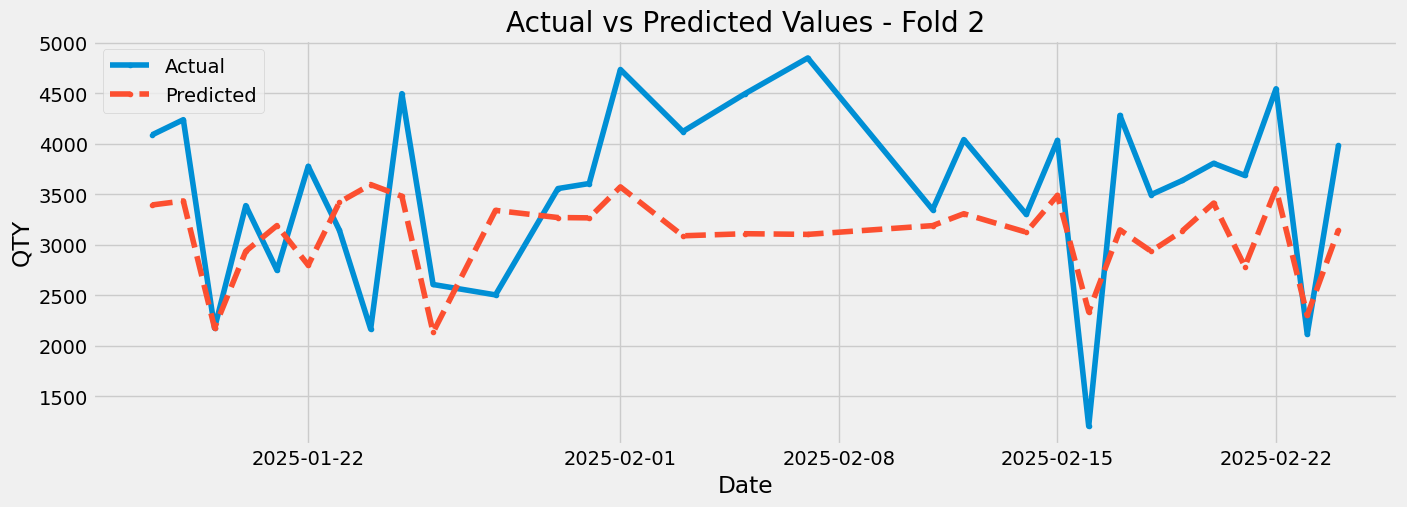

In [ ]:
for i in range(len(preds)):
    plt.figure(figsize=(15, 5))
    plt.plot(actuals[i].index, actuals[i].values, label='Actual', marker='.', linestyle='-') #plot actual values
    plt.plot(actuals[i].index, preds[i], label='Predicted', marker='.', linestyle='--') #plot predicted values
    plt.title(f'Actual vs Predicted Values - Fold {i+1}')
    plt.xlabel('Date')
    plt.ylabel('QTY')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
# start_date_str = input("Masukkan tanggal awal (YYYY-MM-DD): ")
# end_date_str = input("Masukkan tanggal akhir (YYYY-MM-DD): ")

# # Konversi input string ke datetime
# try:
#     start_date = pd.to_datetime(start_date_str)
#     end_date = pd.to_datetime(end_date_str)
# except ValueError:
#     print("Format tanggal tidak valid. Gunakan format YYYY-MM-DD")
#     exit()


# # Membuat dataframe untuk data baru
# future = pd.date_range(start_date, end_date, freq='1D') # Ganti freq sesuai kebutuhan, misal '1H' untuk per jam
# future_df = pd.DataFrame(index=future)
# future_df['isFuture'] = True
# dfc['isFuture'] = False
# df_and_future = pd.concat([dfc, future_df])
# df_and_future = create_features(df_and_future)
# df_and_future = add_lags(df_and_future)

# future_w_features = df_and_future.query('isFuture').copy()

# # Prediksi pada data baru
# FEATURES = ['dayofyear', 'dayofweek', 'quarter', 'month','year',
#                 'lag1','lag2','lag3', 'lag4', 'lag5']

# future_w_features['pred'] = reg.predict(future_w_features[FEATURES])

# # Hitung total prediksi
# total_predicted_qty = future_w_features['pred'].sum()

# # Plot hasil prediksi
# future_w_features['pred'].plot(figsize=(10, 5),
#                                color=color_pal[4],
#                                ms=1,
#                                lw=1,
#                                title='Future Predictions')
# plt.show()

# # Tampilkan total prediksi
# print(f"Total prediksi QTY dari {start_date_str} hingga {end_date_str}: {total_predicted_qty:.0f}")

#Mengunakan Sarima

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.8 MB/s eta 0:00:00


In [ ]:
dfar = dfa.copy()
dfar = dfar.set_index('TGL JUAL') #set the index
dfar.index = pd.to_datetime(dfar.index) #convert index to datetime
dfar = dfar.resample('d').sum() #now it will work
print(dfar.head())

              QTY
TGL JUAL         
2022-04-10  340.0
2022-04-11    0.0
2022-04-12    0.0
2022-04-13    0.0
2022-04-14    0.0


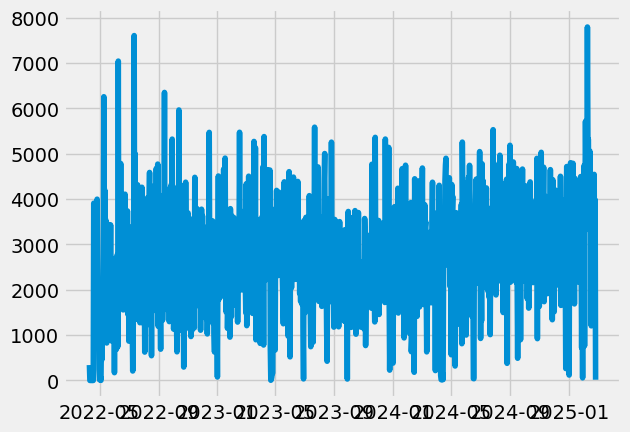

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_predict # Import plot_predict


plt.plot(dfar.index, dfar['QTY'])

In [ ]:
# # dfar = dfar.query('QTY > 1000').copy()
dfar = dfar.query('QTY > 500')

In [ ]:
# Mengganti nilai QTY yang lebih dari 6000 menjadi 6000
dfar['QTY'] = dfar['QTY'].where(dfar['QTY'] <= 6000, 6000)

<ipython-input-62-ada5c5d27d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfar['QTY'] = dfar['QTY'].where(dfar['QTY'] <= 6000, 6000)


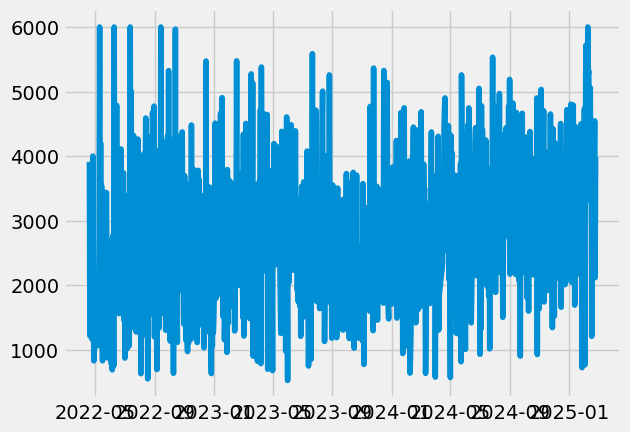

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dfar.index, dfar['QTY'])

In [ ]:
dfar.head()

QTY
TGL JUAL          
2022-04-19  3910.0
2022-04-20  1214.0
2022-04-21  2488.0
2022-04-22  1410.0
2022-04-23  2374.0

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(dfar, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=21.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=17394.043, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=17144.967, Time=4.30 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.22 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=17392.273, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=17395.978, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=17043.066, Time=9.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=20.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=17049.228, Time=12.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=17024.306, Time=13.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=17120.724, Time=10.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=24.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=8.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=17025.849, Time=14.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=23.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=17035.918, Time=14.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=33.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,0)[12]             : AIC=17023.451, Time=8.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,0)[12]             : AIC=17119.386, Time=3.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,1,1)[12]             : AIC=inf, Time=13.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,1)[12]             : AIC=inf, Time=5.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,0)[12]             : AIC=17042.511, Time=7.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(2,1,0)[12]             : AIC=17025.031, Time=12.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,1,0)[12]             : AIC=17025.191, Time=13.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,1,0)[12]             : AIC=inf, Time=17.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,1,0)[12]             : AIC=inf, Time=29.67 sec

Best model:  ARIMA(2,0,0)(2,1,0)[12]          
Total fit time: 338.044 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1007
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -8506.725
Date:                            Wed, 05 Mar 2025   AIC                          17023.451
Time:                                    02:02:08   BIC                          17047.964
Sample:                                         0   HQIC                         17032.770
                                           - 1007                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0768      0.035     -2.203      0.028      -0.145      -0.008
ar.L2          0.1480      0.032      4.621      0.000       0.085       0.211
ar.S.L12      -0.6501      0.030    -21.439      0.000      -0.710      -0.591
ar.S.L24      -0.3157      0.032     -9.761      0.000      -0.379      -0.252
sigma2      1.551e+06   6.62e+04     23.423      0.000    1.42e+06    1.68e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                11.22
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

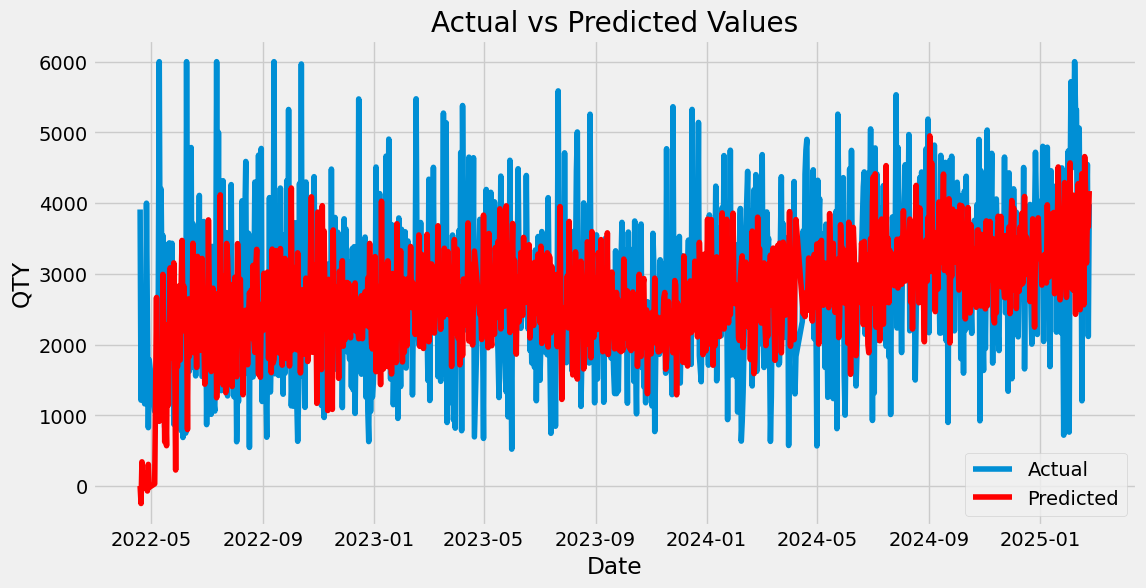

In [ ]:
# Generate predictions
predictions = smodel.predict_in_sample()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dfar.index, dfar['QTY'], label='Actual')
plt.plot(dfar.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.legend()
plt.grid(True)
plt.show()

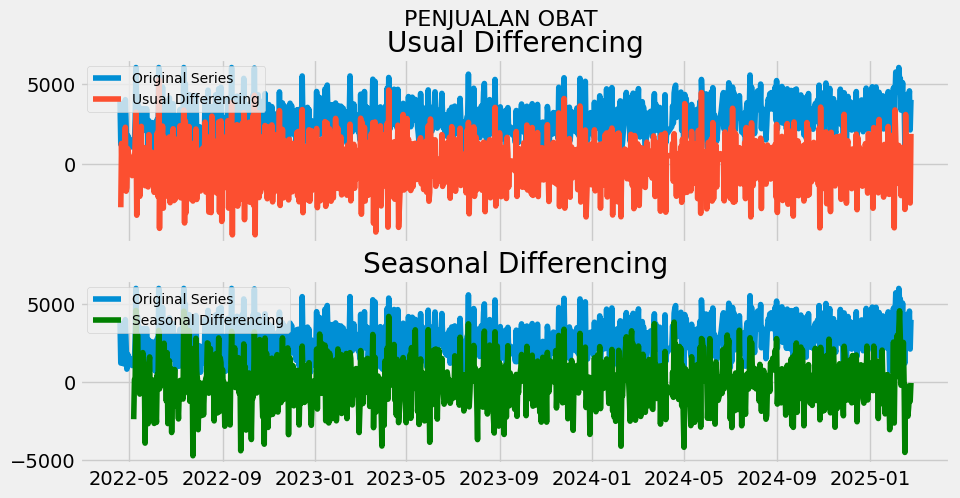

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dfar[:], label='Original Series')
axes[0].plot(dfar[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(dfar[:], label='Original Series')
axes[1].plot(dfar[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('PENJUALAN OBAT', fontsize=16)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


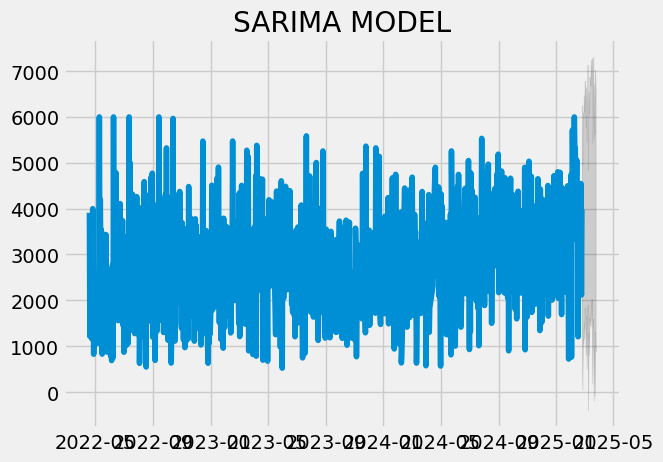

In [ ]:
n_periods = 30
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(dfar.index[-1], periods = n_periods, freq='D')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(dfar)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA MODEL")
plt.show()

In [ ]:
# Convert to pandas Series if it is not already
if not isinstance(fitted, pd.Series):
    fitted = pd.Series(fitted)

# Create a DataFrame with a 'QTY' column
df_fitted = pd.DataFrame({'QTY': fitted})

# Create a date range index starting from '2025-02-24'
start_date = '2025-02-25'
date_range = pd.date_range(start=start_date, periods=len(df_fitted))

# Set the index of the DataFrame
df_fitted.index = date_range

# df_fitted = df_fitted.iloc[1:]

# Print the DataFrame
print(df_fitted)

                    QTY
2025-02-25  3811.972012
2025-02-26  2501.319796
2025-02-27  3622.839667
2025-02-28  3532.221289
2025-03-01  3989.913342
2025-03-02  3637.667039
2025-03-03  4314.237481
2025-03-04  4162.561996
2025-03-05  3284.010422
2025-03-06  4160.262088
2025-03-07  2983.228206
2025-03-08  3885.393141
2025-03-09  4521.396464
2025-03-10  2220.026901
2025-03-11  3918.582780
2025-03-12  3443.585764
2025-03-13  4248.316024
2025-03-14  4074.065155
2025-03-15  4257.517668
2025-03-16  4624.037517
2025-03-17  4050.186470
2025-03-18  4655.075085
2025-03-19  2808.316414
2025-03-20  3968.461873
2025-03-21  4454.158363
2025-03-22  2655.674019
2025-03-23  3856.422105
2025-03-24  2766.531979
2025-03-25  4172.525969
2025-03-26  3746.252402


In [ ]:
dfar.tail()

QTY
TGL JUAL          
2025-02-20  3808.0
2025-02-21  3688.0
2025-02-22  4546.0
2025-02-23  2115.0
2025-02-24  3985.0

In [ ]:
dfarfitted =pd.concat([dfar, df_fitted])
dfarfitted.tail(40)

QTY
2025-02-15  4035.000000
2025-02-16  1205.000000
2025-02-17  4282.000000
2025-02-18  3498.000000
2025-02-19  3638.000000
2025-02-20  3808.000000
2025-02-21  3688.000000
2025-02-22  4546.000000
2025-02-23  2115.000000
2025-02-24  3985.000000
2025-02-25  3811.972012
2025-02-26  2501.319796
2025-02-27  3622.839667
2025-02-28  3532.221289
2025-03-01  3989.913342
2025-03-02  3637.667039
2025-03-03  4314.237481
2025-03-04  4162.561996
2025-03-05  3284.010422
2025-03-06  4160.262088
2025-03-07  2983.228206
2025-03-08  3885.393141
2025-03-09  4521.396464
2025-03-10  2220.026901
2025-03-11  3918.582780
2025-03-12  3443.585764
2025-03-13  4248.316024
2025-03-14  4074.065155
2025-03-15  4257.517668
2025-03-16  4624.037517
2025-03-17  4050.186470
2025-03-18  4655.075085
2025-03-19  2808.316414
2025-03-20  3968.461873
2025-03-21  4454.158363
2025-03-22  2655.674019
2025-03-23  3856.422105
2025-03-24  2766.531979
2025-03-25  4172.525969
2025-03-26  3746.252402

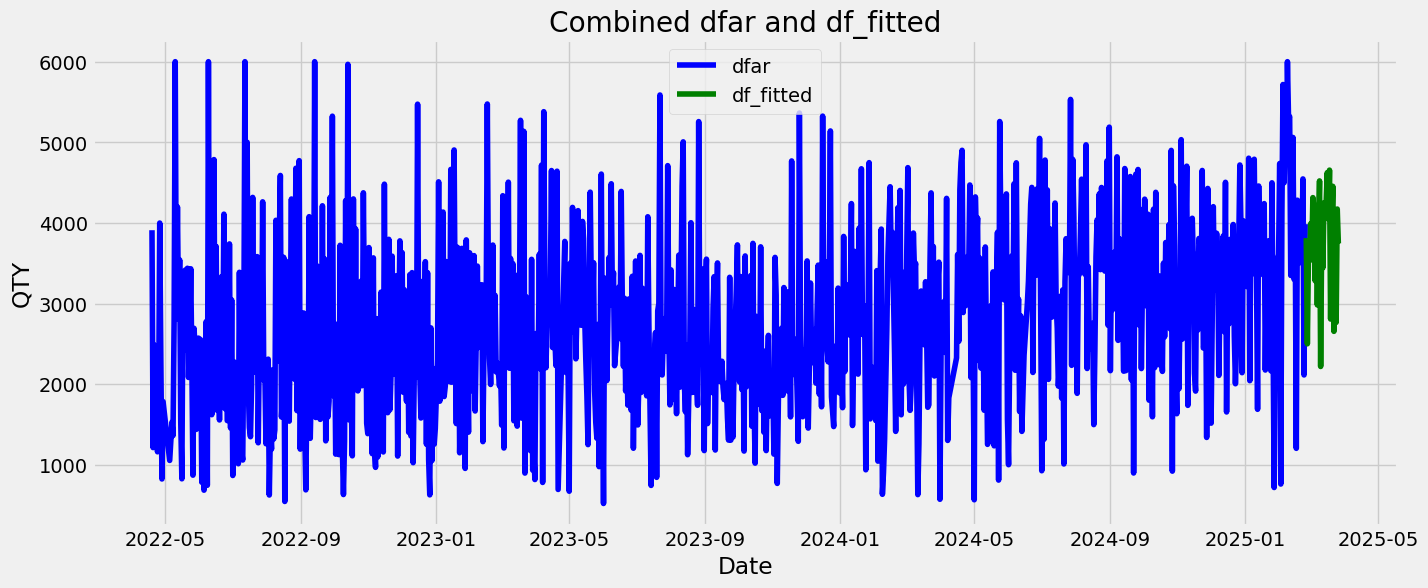

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(dfar.index, dfar['QTY'], label='dfar', color='blue')
plt.plot(df_fitted.index, df_fitted['QTY'], label='df_fitted', color='green')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.title('Combined dfar and df_fitted')
plt.legend()
plt.grid(True)
plt.show()

#Menggunakan Sarima weekly

In [ ]:
dfat = dfa.copy()
dfat = dfat.set_index('TGL JUAL') #set the index
dfat.index = pd.to_datetime(dfat.index) #convert index to datetime
dfat = dfat.resample('W').sum() #now it will work
print(dfat.head())

                QTY
TGL JUAL           
2022-04-10    340.0
2022-04-17     34.0
2022-04-24  12558.0
2022-05-01  10888.0
2022-05-08   4500.0


In [ ]:
dfat = dfat.iloc[3:]
dfat = dfat.iloc[:-1]

In [ ]:
dfat['QTY'] = dfat['QTY'].where(dfat['QTY'] <= 30000, 30000)
dfat['QTY'] = dfat['QTY'].where(dfat['QTY'] >= 9000, 9000)

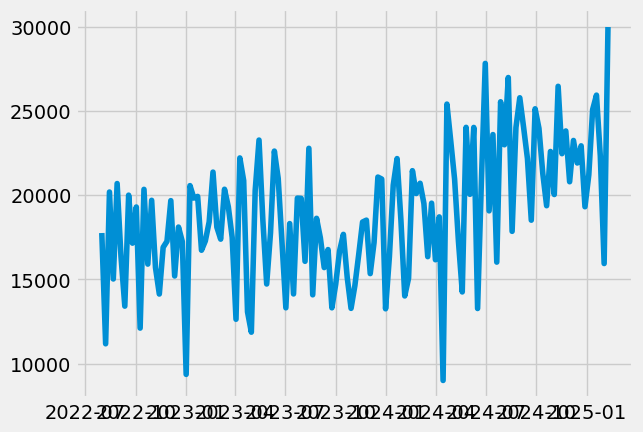

In [ ]:
plt.plot(dfat.index, dfat['QTY'])

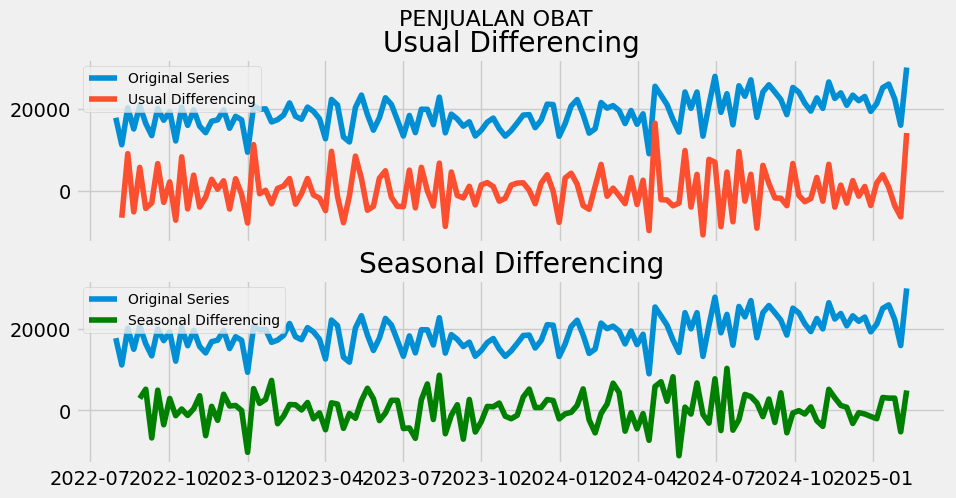

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dfat[:], label='Original Series')
axes[0].plot(dfat[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(dfat[:], label='Original Series')
axes[1].plot(dfat[:].diff(4), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('PENJUALAN OBAT', fontsize=16)
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.stattools import acf

# def detect_seasonality_acf(series, max_lag=24):
#     """Mendeteksi pola musiman dengan ACF dan menentukan `m` terbaik."""
#     acf_values = acf(series, nlags=max_lag, fft=True)

#     # Cari lag dengan puncak signifikan
#     threshold = 0.5 * max(acf_values)  # Atur threshold signifikan
#     seasonal_lags = [lag for lag in range(1, max_lag) if acf_values[lag] > threshold]

#     if len(seasonal_lags) > 1:
#         m = seasonal_lags[0]  # Ambil lag pertama dengan puncak signifikan
#         print(f"Nilai m (seasonal period) yang terdeteksi: {m}")
#     else:
#         m = 1  # Jika tidak ada pola musiman yang kuat
#         print("Tidak ada pola musiman yang jelas. Gunakan m=1.")

#     # Plot ACF
#     plt.figure(figsize=(8,4))
#     plt.bar(range(len(acf_values)), acf_values)
#     plt.axvline(m, color='red', linestyle='dashed', label=f'Seasonality (m={m})')
#     plt.xlabel('Lag')
#     plt.ylabel('ACF Value')
#     plt.title('Autocorrelation Function (ACF)')
#     plt.legend()
#     plt.show()

#     return m

# from scipy.signal import periodogram

# def detect_seasonality_periodogram(series, sampling_rate=1):
#     """Mendeteksi pola musiman menggunakan periodogram (analisis frekuensi)."""
#     freqs, power = periodogram(series, fs=sampling_rate)

#     # Ambil frekuensi dengan power tertinggi (kecuali 0)
#     dominant_freq = freqs[np.argmax(power[1:]) + 1]  # Hindari frekuensi nol
#     m = int(round(1 / dominant_freq)) if dominant_freq > 0 else 1

#     print(f"Nilai m (seasonal period) yang terdeteksi: {m}")

#     # Plot Periodogram
#     plt.figure(figsize=(8,4))
#     plt.plot(freqs, power, label='Power Spectrum')
#     plt.axvline(dominant_freq, color='red', linestyle='dashed', label=f'Dominant Frequency (m={m})')
#     plt.xlabel('Frequency')
#     plt.ylabel('Power')
#     plt.title('Periodogram')
#     plt.legend()
#     plt.show()

#     return m


In [ ]:
dfat['QTY'].describe()

count      133.000000
mean     18946.823308
std       3920.854899
min       9000.000000
25%      16352.000000
50%      19077.000000
75%      21293.000000
max      30000.000000
Name: QTY, dtype: float64

Nilai m (seasonal period) yang terdeteksi: 133


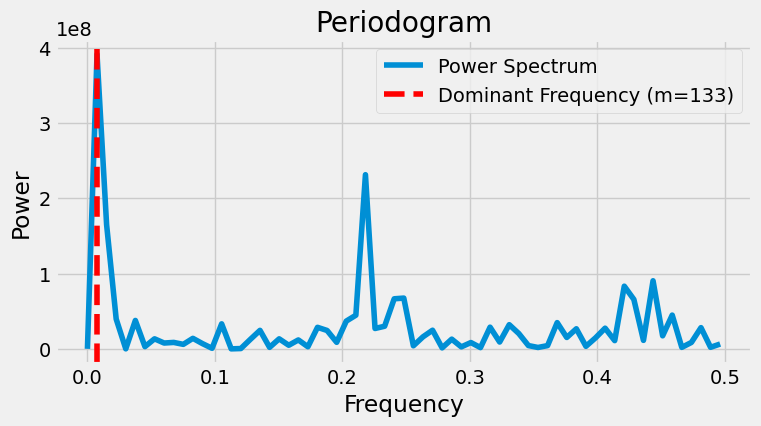

In [ ]:
# m = detect_seasonality_periodogram(dfat['QTY'])

In [ ]:
dfat.shape

(133, 1)

In [ ]:
smodel = pm.auto_arima(dfat, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=4,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[4] intercept   : AIC=2501.723, Time=0.27 sec
 ARIMA(0,0,0)(0,1,0)[4] intercept   : AIC=2506.575, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[4] intercept   : AIC=2502.816, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[4] intercept   : AIC=2501.482, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[4]             : AIC=2505.084, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[4] intercept   : AIC=2504.303, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[4] intercept   : AIC=inf, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[4] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,1)(1,1,0)[4] intercept   : AIC=2503.422, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[4] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(0,1,1)[4] intercept   : AIC=2501.160, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[4] intercept   : AIC=inf, Time=2.43 sec
 ARIMA(0,0,0)(1,1,0)[4] intercept   : AIC=2504.838, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,2)[4] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,1,1)[4] intercept   : AIC=2501.096, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[4] intercept   : AIC=2503.633, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[4] intercept   : AIC=inf, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,2)[4] intercept   : AIC=inf, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,2)[4] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,0,0)(0,1,1)[4] intercept   : AIC=2501.141, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,1)[4] intercept   : AIC=2502.516, Time=0.20 sec
 ARIMA(1,0,0)(0,1,1)[4]             : AIC=2500.672, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[4]             : AIC=2502.339, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[4]             : AIC=2496.451, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[4]             : AIC=2501.887, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,1,1)[4]             : AIC=2496.463, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,2)[4]             : AIC=2496.857, Time=0.23 sec
 ARIMA(1,0,0)(0,1,2)[4]             : AIC=2495.467, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[4]             : AIC=2494.044, Time=0.11 sec
 ARIMA(0,0,0)(0,1,1)[4]             : AIC=2501.225, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,2)[4]             : AIC=2494.543, Time=0.38 sec
 ARIMA(0,0,0)(1,1,1)[4]             : AIC=2494.661, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[4]             : AIC=2495.350, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[4]             : AIC=2496.357, Time=0.26 sec

Best model:  ARIMA(0,0,0)(0,1,2)[4]          
Total fit time: 10.600 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                  133
Model:             SARIMAX(0, 1, [1, 2], 4)   Log Likelihood               -1244.022
Date:                      Wed, 05 Mar 2025   AIC                           2494.044
Time:                              03:02:50   BIC                           2502.624
Sample:                          07-31-2022   HQIC                          2497.530
                               - 02-09-2025                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L4       -0.3149      0.066     -4.739      0.000      -0.445      -0.185
ma.S.L8       -0.2454      0.070     -3.512      0.000      -0.382      -0.108
sigma2      1.208e+07   1.52e+06      7.969      0.000    9.11e+06     1.5e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.28   Prob(JB):                         0.50
Heteroskedasticity (H):               1.20   Skew:                            -0.23
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

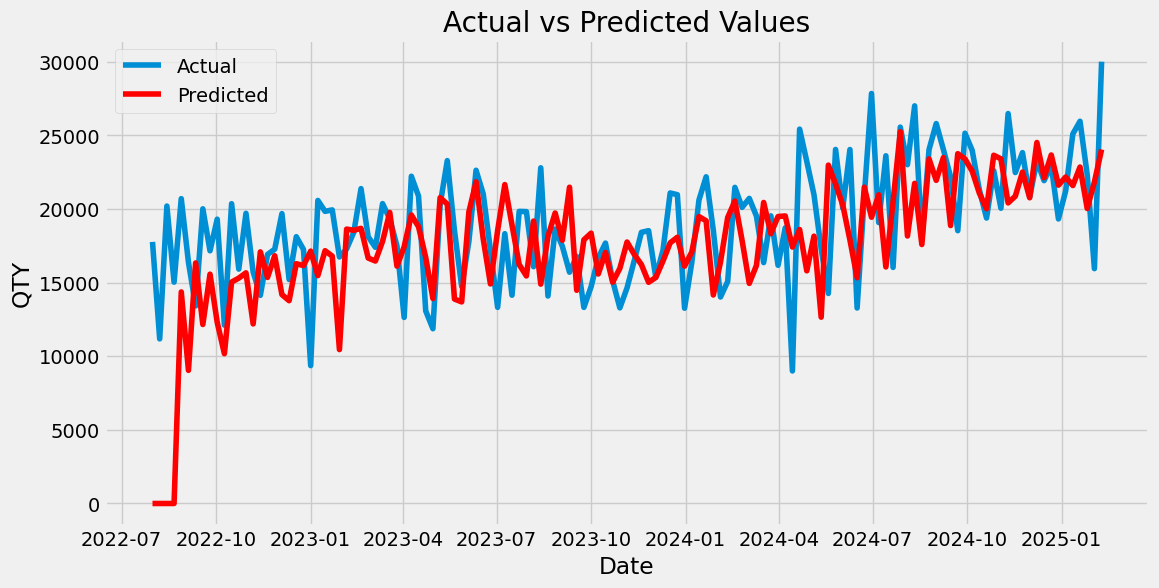

In [ ]:
# Generate predictions
predictions = smodel.predict_in_sample()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dfat.index, dfat['QTY'], label='Actual')
plt.plot(dfat.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dfat.tail()

QTY
TGL JUAL           
2025-01-12  25092.0
2025-01-19  25954.0
2025-01-26  22334.0
2025-02-02  15947.0
2025-02-09  30000.0

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

actual_values = dfat['QTY'][7:]
predicted_values = predictions[7:]

# Hitung RMSE setelah mengabaikan 7 baris awal
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")


RMSE: 3662.3677386160475


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


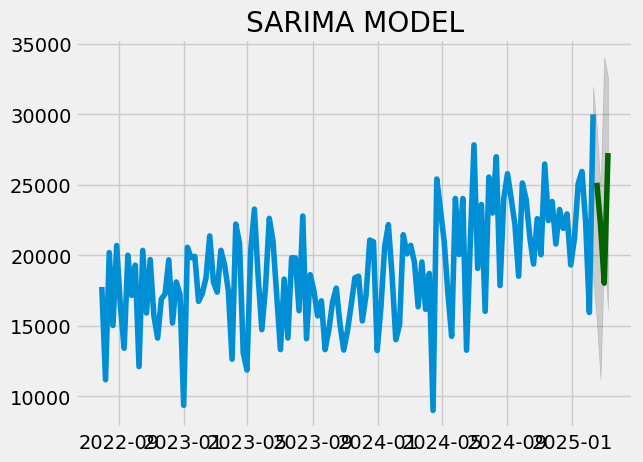

In [ ]:
n_periods = 5
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(dfat.index[-1], periods = n_periods, freq='W')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(dfat)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA MODEL")
plt.show()

In [ ]:
# Convert to pandas Series if it is not already
if not isinstance(fitted, pd.Series):
    fitted = pd.Series(fitted)

# Create a DataFrame with a 'QTY' column
df_fitted = pd.DataFrame({'QTY': fitted})

# Create a date range index starting from '2025-02-25' with a frequency of 7 days
start_date = '2025-02-16'
date_range = pd.date_range(start=start_date, periods=len(df_fitted), freq='7D')

# Set the index of the DataFrame
df_fitted.index = date_range

# df_fitted = df_fitted.iloc[1:]

# Print the DataFrame
print(df_fitted)

                     QTY
2025-02-16  25152.285864
2025-02-23  22171.958178
2025-03-02  18030.218872
2025-03-09  27262.925573
2025-03-16  24389.221092


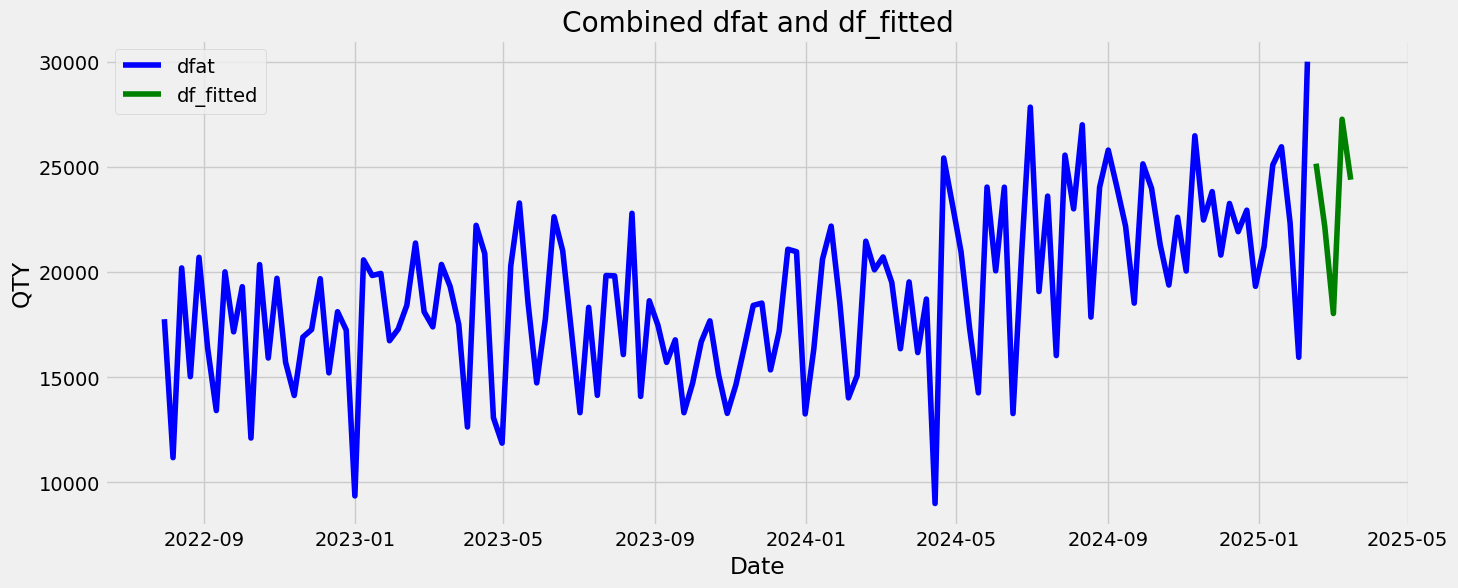

In [ ]:
dfarfitted =pd.concat([dfat, df_fitted])
plt.figure(figsize=(15, 6))
plt.plot(dfat.index, dfat['QTY'], label='dfat', color='blue')
plt.plot(df_fitted.index, df_fitted['QTY'], label='df_fitted', color='green')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.title('Combined dfat and df_fitted')
plt.legend()
plt.grid(True)
plt.show()

#Per barang

##spironol

In [ ]:
df_spironol = df_spironol[['TGL JUAL', 'QTY']]
dfspi = df_spironol.copy()
dfspi = dfspi.set_index('TGL JUAL') #set the index
dfspi.index = pd.to_datetime(dfspi.index) #convert index to datetime
dfspi = dfspi.resample('W').sum() #now it will work
dfspi = dfspi.iloc[3:]
dfspi = dfspi.iloc[:-1]
print(dfspi.head())

               QTY
TGL JUAL          
2022-05-01  1962.0
2022-05-08   517.0
2022-05-15  3266.0
2022-05-22  3814.0
2022-05-29  3055.0


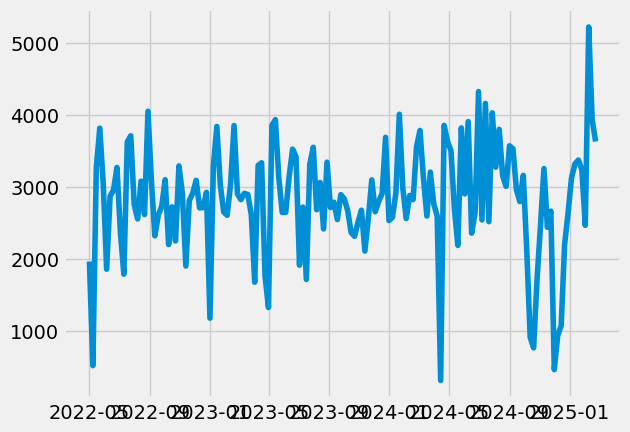

In [ ]:
plt.plot(dfspi.index, dfspi['QTY'])

In [ ]:
dfspi['QTY'] = dfspi['QTY'].where(dfspi['QTY'] <= 4500, 4500)
dfspi['QTY'] = dfspi['QTY'].where(dfspi['QTY'] >= 1000, 1000)

Nilai m (seasonal period) yang terdeteksi: 5


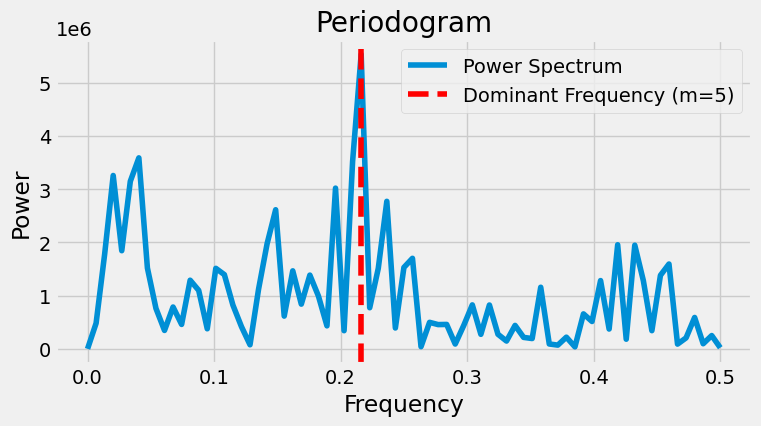

In [ ]:
from scipy.signal import periodogram

def detect_seasonality_periodogram(series, sampling_rate=1):
    """Mendeteksi pola musiman menggunakan periodogram (analisis frekuensi)."""
    freqs, power = periodogram(series, fs=sampling_rate)

    # Ambil frekuensi dengan power tertinggi (kecuali 0)
    dominant_freq = freqs[np.argmax(power[1:]) + 1]  # Hindari frekuensi nol
    m = int(round(1 / dominant_freq)) if dominant_freq > 0 else 1

    print(f"Nilai m (seasonal period) yang terdeteksi: {m}")

    # Plot Periodogram
    plt.figure(figsize=(8,4))
    plt.plot(freqs, power, label='Power Spectrum')
    plt.axvline(dominant_freq, color='red', linestyle='dashed', label=f'Dominant Frequency (m={m})')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.title('Periodogram')
    plt.legend()
    plt.show()

    return m

m = detect_seasonality_periodogram(dfspi['QTY'])

In [ ]:
smodel = pm.auto_arima(dfspi, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=5,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=2308.434, Time=0.78 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=2349.439, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=2332.049, Time=0.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=2309.186, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=2347.635, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[5] intercept   : AIC=2345.761, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,1)[5] intercept   : AIC=2309.377, Time=0.94 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[5] intercept   : AIC=inf, Time=2.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,0)[5] intercept   : AIC=2334.141, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,1,2)[5] intercept   : AIC=2310.578, Time=1.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[5] intercept   : AIC=2307.639, Time=0.40 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=2343.764, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=0.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,2)[5] intercept   : AIC=inf, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,2)[5] intercept   : AIC=inf, Time=0.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,1)[5] intercept   : AIC=2317.547, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,1,1)[5] intercept   : AIC=2309.491, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,1)[5] intercept   : AIC=2309.062, Time=0.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[5]             : AIC=2306.425, Time=0.21 sec
 ARIMA(1,0,0)(0,1,0)[5]             : AIC=2341.864, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[5]             : AIC=inf, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,2)[5]             : AIC=2299.133, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,2)[5]             : AIC=2301.133, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[5]             : AIC=inf, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,1,2)[5]             : AIC=2301.125, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[5]             : AIC=2301.126, Time=0.62 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[5]             : AIC=2300.081, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,1,2)[5]             : AIC=inf, Time=1.02 sec

Best model:  ARIMA(1,0,0)(0,1,2)[5]          
Total fit time: 15.316 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  148
Model:             SARIMAX(1, 0, 0)x(0, 1, [1, 2], 5)   Log Likelihood               -1145.566
Date:                                Wed, 05 Mar 2025   AIC                           2299.133
Time:                                        05:18:05   BIC                           2310.984
Sample:                                    05-01-2022   HQIC                          2303.949
                                         - 02-23-2025                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2693      0.062      4.327      0.000       0.147       0.391
ma.S.L5       -0.6490      0.086     -7.518      0.000      -0.818      -0.480
ma.S.L10      -0.2654      0.088     -3.031      0.002      -0.437      -0.094
sigma2      4.961e+05   5.73e+04      8.654      0.000    3.84e+05    6.08e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.76
Prob(Q):                              0.98   Prob(JB):                         0.25
Heteroskedasticity (H):               1.66   Skew:                            -0.21
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

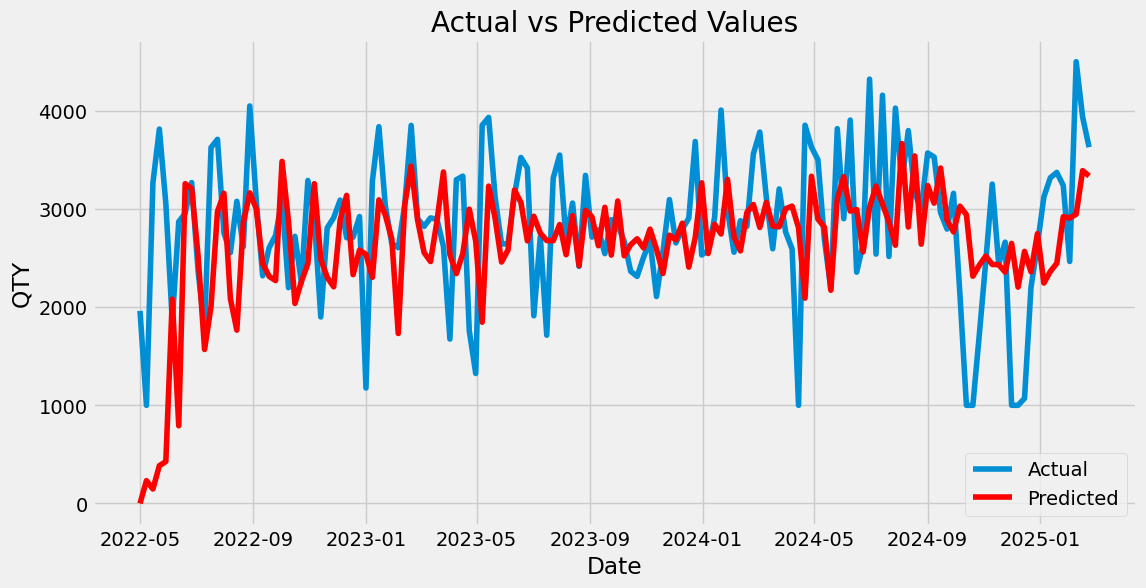

In [ ]:
# Generate predictions
predictions = smodel.predict_in_sample()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dfspi.index, dfspi['QTY'], label='Actual')
plt.plot(dfspi.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate and print the mean of the 'QTY' column in dfspi
mean_qty = dfspi['QTY'].mean()

# Calculate RMSE
actual_values = dfspi['QTY'][7:]
predicted_values = predictions[7:]
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate NRMSE
nrmse = rmse / (dfspi['QTY'].max() - dfspi['QTY'].min())

print(f"NRMSE: {nrmse}")

# Check if NRMSE is less than a threshold (e.g., 0.2)
if nrmse < 0.2:
    print("Model optimal. NRMSE di bawah threshold.")
else:
    print("Model kurang optimal. NRMSE di atas threshold.")

NRMSE: 0.20378875442224711
Model kurang optimal. NRMSE di atas threshold.


##gliquidone

In [ ]:
df_gli = df_gli[['TGL JUAL', 'QTY']]
dfgli = df_gli.copy()
dfgli = dfgli.set_index('TGL JUAL') #set the index
dfgli.index = pd.to_datetime(dfgli.index) #convert index to datetime
dfgli = dfgli.resample('W').sum() #now it will work
print(dfgli.head())

               QTY
TGL JUAL          
2022-04-24  1872.0
2022-05-01  3022.0
2022-05-08   316.0
2022-05-15  6223.0
2022-05-22  3082.0


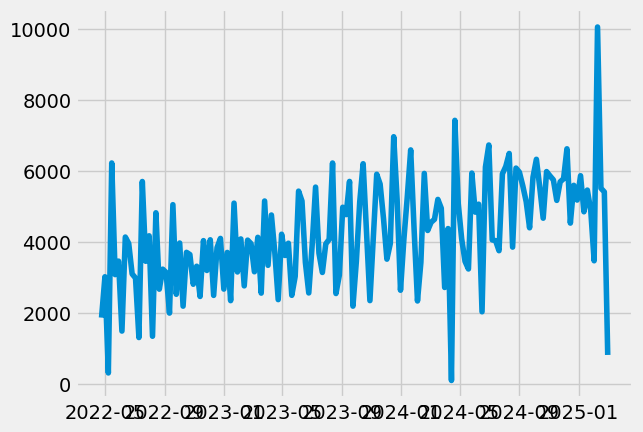

In [ ]:
plt.plot(dfgli.index, dfgli['QTY'])

In [ ]:
dfgli['QTY'] = dfgli['QTY'].where(dfgli['QTY'] <= 7900, 7900)
dfgli['QTY'] = dfgli['QTY'].where(dfgli['QTY'] >= 1000, 1000)

Nilai m (seasonal period) yang terdeteksi: 150


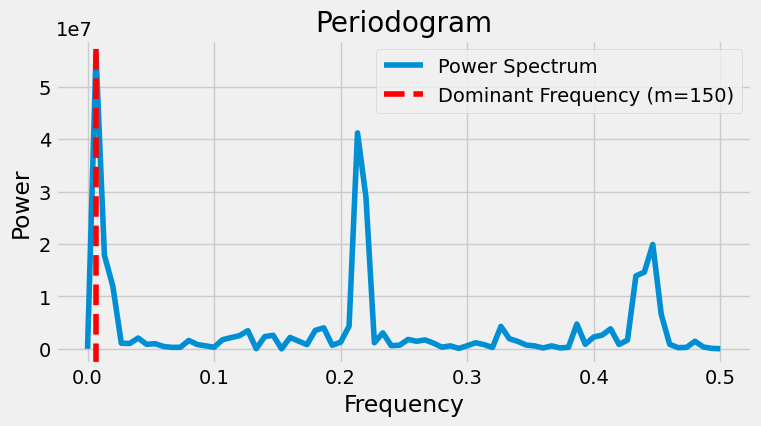

In [ ]:
m = detect_seasonality_periodogram(dfgli['QTY'])

In [ ]:
smodel = pm.auto_arima(dfgli, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=5,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=2459.967, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=2477.718, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=2460.311, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=2457.988, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=2476.019, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[5] intercept   : AIC=2458.432, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[5] intercept   : AIC=inf, Time=0.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[5] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,1)(1,1,0)[5] intercept   : AIC=2458.868, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[5] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,0,0)(0,1,1)[5] intercept   : AIC=2477.807, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,1,1)[5] intercept   : AIC=2459.978, Time=0.30 sec
 ARIMA(1,0,0)(0,1,1)[5] intercept   : AIC=2459.634, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,1,1)[5] intercept   : AIC=2460.611, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[5]             : AIC=2458.607, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,1,1)[5] intercept
Total fit time: 4.279 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  150
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 5)   Log Likelihood               -1224.994
Date:                           Wed, 05 Mar 2025   AIC                           2457.988
Time:                                   05:18:27   BIC                           2469.894
Sample:                               04-24-2022   HQIC                          2462.826
                                    - 03-02-2025                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     78.7351     44.557      1.767      0.077      -8.595     166.065
ma.L1         -0.4398      0.079     -5.593      0.000      -0.594      -0.286
ma.S.L5       -0.1652      0.085     -1.935      0.053      -0.333       0.002
sigma2      1.252e+06   1.21e+05     10.325      0.000    1.01e+06    1.49e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.86
Prob(Q):                              0.95   Prob(JB):                         0.01
Heteroskedasticity (H):               1.57   Skew:                            -0.18
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

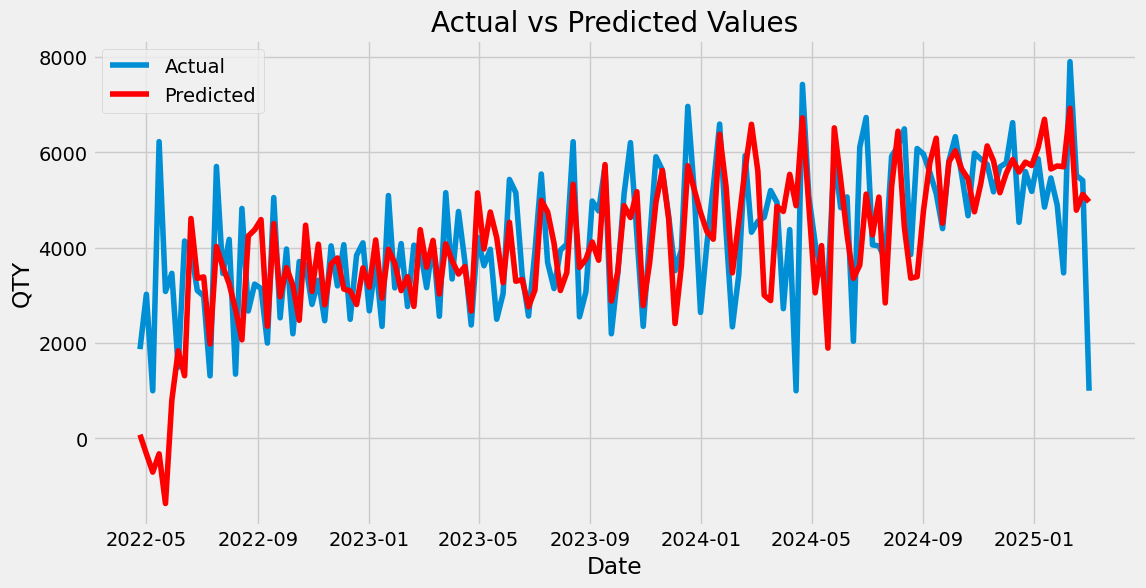

In [ ]:
# Generate predictions
predictions = smodel.predict_in_sample()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dfgli.index, dfgli['QTY'], label='Actual')
plt.plot(dfgli.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate and print the mean of the 'QTY' column in dfgli
mean_qty = dfgli['QTY'].mean()

# Calculate RMSE
actual_values = dfgli['QTY'][7:]
predicted_values = predictions[7:]
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate NRMSE
nrmse = rmse / (dfgli['QTY'].max() - dfgli['QTY'].min())

print(f"NRMSE: {nrmse}")

# Check if NRMSE is less than a threshold (e.g., 0.2)
if nrmse < 0.2:
    print("Model optimal. NRMSE di bawah threshold.")
else:
    print("Model kurang optimal. NRMSE di atas threshold.")

NRMSE: 0.1618176623563575
Model optimal. NRMSE di bawah threshold.


##ryzodeg

              QTY
TGL JUAL         
2022-05-15  333.0
2022-05-22  138.0
2022-05-29  220.0
2022-06-05  102.0
2022-06-12  199.0


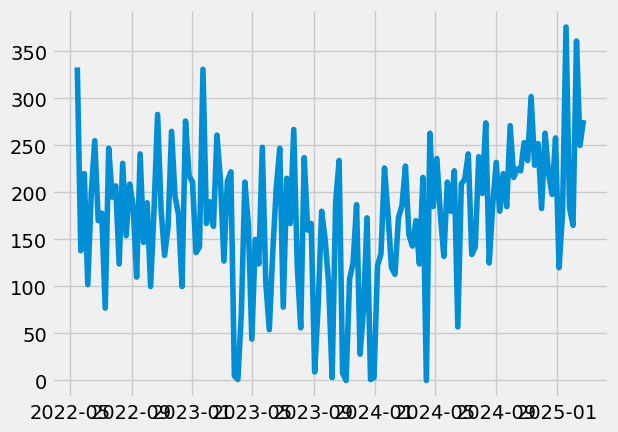

In [ ]:
df_ryz = df_ryz[['TGL JUAL', 'QTY']]
dfryz = df_ryz.copy()
dfryz = dfryz.set_index('TGL JUAL') #set the index
dfryz.index = pd.to_datetime(dfryz.index) #convert index to datetime
dfryz = dfryz.resample('W').sum() #now it will work
dfryz = dfryz.iloc[3:]
dfryz = dfryz.iloc[:-1]
print(dfryz.head())
plt.plot(dfryz.index, dfryz['QTY'])

In [ ]:
# dfryz['QTY'] = dfryz['QTY'].where(dfryz['QTY'] <= 7900, 7900)
dfryz['QTY'] = dfryz['QTY'].where(dfryz['QTY'] >= 50, 50)

Nilai m (seasonal period) yang terdeteksi: 146


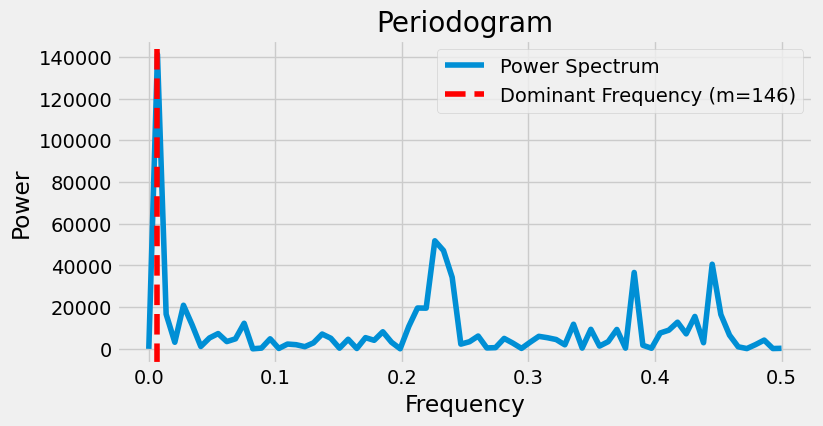

In [ ]:
m = detect_seasonality_periodogram(dfryz['QTY'])

In [ ]:
smodel = pm.auto_arima(dfryz, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=5,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=1601.829, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=1601.709, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=1603.014, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=1600.277, Time=1.39 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=1599.796, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,0)[5] intercept   : AIC=1602.528, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,1)[5] intercept   : AIC=1599.731, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[5] intercept   : AIC=inf, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,2)[5] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,0,0)(0,1,1)[5] intercept   : AIC=1600.582, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,1)[5]             : AIC=1597.949, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[5]             : AIC=inf, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[5]             : AIC=1578.913, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,2)[5]             : AIC=inf, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,2)[5]             : AIC=1580.905, Time=0.46 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,2)[5]             : AIC=1580.904, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[5]             : AIC=inf, Time=0.54 sec

Best model:  ARIMA(0,0,0)(0,1,2)[5]          
Total fit time: 6.926 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                  146
Model:             SARIMAX(0, 1, [1, 2], 5)   Log Likelihood                -786.456
Date:                      Wed, 05 Mar 2025   AIC                           1578.913
Time:                              05:18:35   BIC                           1587.759
Sample:                          05-15-2022   HQIC                          1582.508
                               - 02-23-2025                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L5       -0.3445      0.107     -3.210      0.001      -0.555      -0.134
ma.S.L10      -0.4363      0.088     -4.981      0.000      -0.608      -0.265
sigma2      3969.4718    427.557      9.284      0.000    3131.476    4807.467
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 3.50
Prob(Q):                              0.92   Prob(JB):                         0.17
Heteroskedasticity (H):               1.21   Skew:                             0.22
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

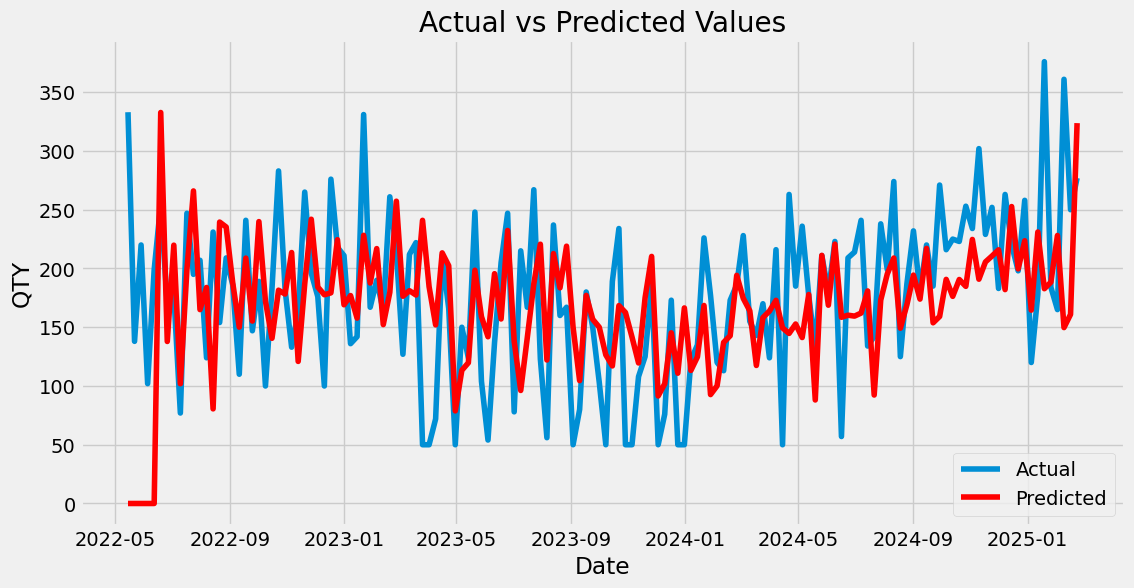

NRMSE: 0.19634189877484712
Model optimal. NRMSE di bawah threshold.


In [ ]:
# Generate predictions
predictions = smodel.predict_in_sample()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dfryz.index, dfryz['QTY'], label='Actual')
plt.plot(dfryz.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.legend()
plt.grid(True)
plt.show()
# Calculate and print the mean of the 'QTY' column in dfryz
mean_qty = dfryz['QTY'].mean()

# Calculate RMSE
actual_values = dfryz['QTY'][7:]
predicted_values = predictions[7:]
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate NRMSE
nrmse = rmse / (dfryz['QTY'].max() - dfryz['QTY'].min())

print(f"NRMSE: {nrmse}")

# Check if NRMSE is less than a threshold (e.g., 0.2)
if nrmse < 0.2:
    print("Model optimal. NRMSE di bawah threshold.")
else:
    print("Model kurang optimal. NRMSE di atas threshold.")

##cansdesartan

                QTY
TGL JUAL           
2022-05-01   5032.0
2022-05-08   3256.0
2022-05-15  12696.0
2022-05-22   9850.0
2022-05-29   8090.0


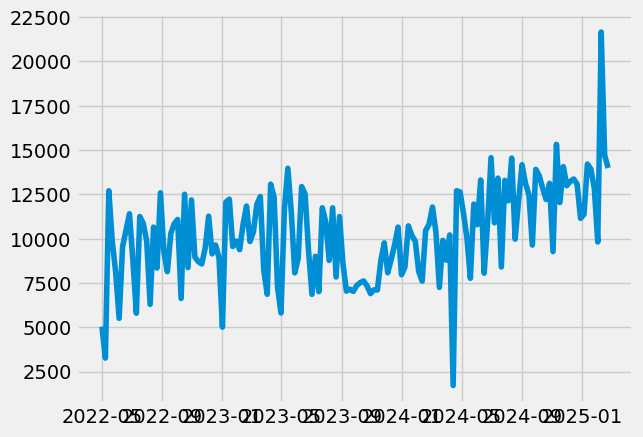

In [ ]:
df_cand = df_cand[['TGL JUAL', 'QTY']]
dfcan = df_cand.copy()
dfcan = dfcan.set_index('TGL JUAL') #set the index
dfcan.index = pd.to_datetime(dfcan.index) #convert index to datetime
dfcan = dfcan.resample('W').sum() #now it will work
dfcan = dfcan.iloc[3:]
dfcan = dfcan.iloc[:-1]
print(dfcan.head())
plt.plot(dfcan.index, dfcan['QTY'])

In [ ]:
dfcan['QTY'] = dfcan['QTY'].where(dfcan['QTY'] <= 17500, 17500)
dfcan['QTY'] = dfcan['QTY'].where(dfcan['QTY'] >= 5000, 5000)

In [ ]:
smodel = pm.auto_arima(dfcan, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=5,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=2614.673, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=2619.463, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=2616.375, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=2613.829, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=2618.538, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[5] intercept   : AIC=2619.124, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,1)[5] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,0,1)(0,1,2)[5] intercept   : AIC=2609.428, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,1,2)[5] intercept   : AIC=inf, Time=0.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,1,2)[5] intercept   : AIC=2606.594, Time=0.31 sec
 ARIMA(0,0,0)(0,1,1)[5] intercept   : AIC=2612.573, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,2)[5] intercept   : AIC=inf, Time=0.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,1,1)[5] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,0)(0,1,2)[5] intercept   : AIC=2609.456, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,2)[5] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,0,0)(0,1,2)[5]             : AIC=2610.465, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,1,2)[5] intercept
Total fit time: 5.632 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                  148
Model:             SARIMAX(0, 1, [1, 2], 5)   Log Likelihood               -1299.297
Date:                      Wed, 05 Mar 2025   AIC                           2606.594
Time:                              05:18:41   BIC                           2618.445
Sample:                          05-01-2022   HQIC                          2611.410
                               - 02-23-2025                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    269.7567     92.532      2.915      0.004      88.397     451.117
ma.S.L5       -0.2841      0.094     -3.013      0.003      -0.469      -0.099
ma.S.L10      -0.2408      0.090     -2.679      0.007      -0.417      -0.065
sigma2      4.643e+06   5.65e+05      8.217      0.000    3.54e+06    5.75e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.84   Prob(JB):                         0.82
Heteroskedasticity (H):               0.91   Skew:                            -0.12
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

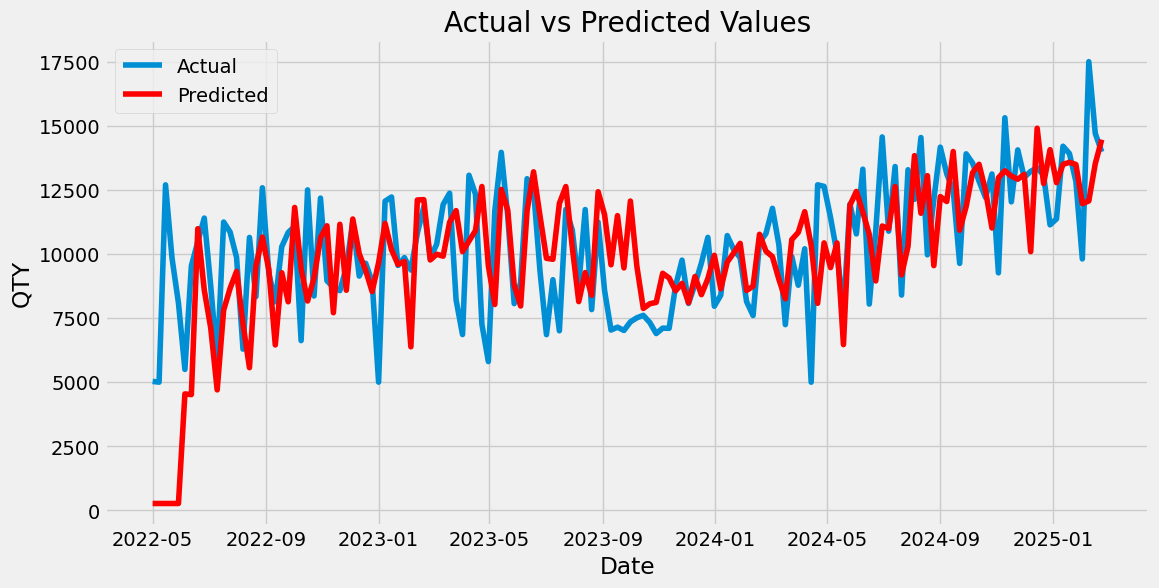

NRMSE: 0.16882218371539176
Model optimal. NRMSE di bawah threshold.


In [ ]:
# Generate predictions
predictions = smodel.predict_in_sample()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dfcan.index, dfcan['QTY'], label='Actual')
plt.plot(dfcan.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.legend()
plt.grid(True)
plt.show()
# Calculate and print the mean of the 'QTY' column in dfcan
mean_qty = dfcan['QTY'].mean()

# Calculate RMSE
actual_values = dfcan['QTY'][7:]
predicted_values = predictions[7:]
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate NRMSE
nrmse = rmse / (dfcan['QTY'].max() - dfcan['QTY'].min())

print(f"NRMSE: {nrmse}")

# Check if NRMSE is less than a threshold (e.g., 0.2)
if nrmse < 0.2:
    print("Model optimal. NRMSE di bawah threshold.")
else:
    print("Model kurang optimal. NRMSE di atas threshold.")

##amitiptyline

               QTY
TGL JUAL          
2022-05-15  1473.0
2022-05-22   899.0
2022-05-29   899.0
2022-06-05   877.0
2022-06-12  1027.0


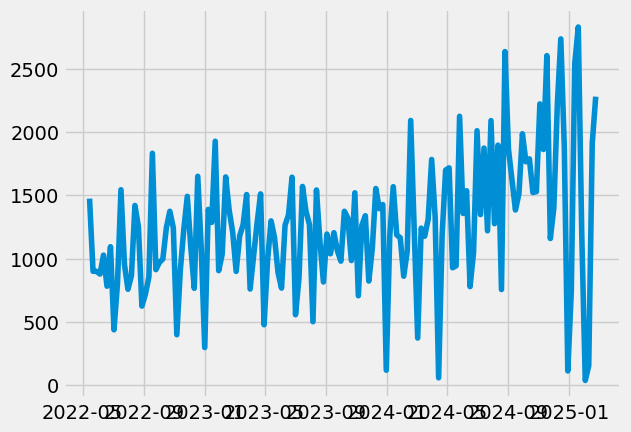

In [ ]:
df_ami = df_ami[['TGL JUAL', 'QTY']]
dfami = df_ami.copy()
dfami = dfami.set_index('TGL JUAL') #set the index
dfami.index = pd.to_datetime(dfami.index) #convert index to datetime
dfami = dfami.resample('W').sum() #now it will work
dfami = dfami.iloc[3:]
dfami = dfami.iloc[:-1]
print(dfami.head())
plt.plot(dfami.index, dfami['QTY'])

In [ ]:
dfami['QTY'] = dfami['QTY'].where(dfami['QTY'] <= 2700, 2700)
dfami['QTY'] = dfami['QTY'].where(dfami['QTY'] >= 500, 500)

In [ ]:
smodel = pm.auto_arima(dfami, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

smodel.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2192.834, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2139.589, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2179.532, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2129.655, Time=0.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=2139.558, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,0)[12]             : AIC=2115.129, Time=3.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,0)[12]             : AIC=2127.584, Time=0.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.87 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,0)[12]             : AIC=2056.632, Time=1.71 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,1,0)[12]             : AIC=2073.404, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(2,1,1)[12]             : AIC=inf, Time=2.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,1,0)[12]             : AIC=2014.288, Time=4.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,1,0)[12]             : AIC=2028.941, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(2,1,1)[12]             : AIC=inf, Time=3.88 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,1,1)[12]             : AIC=inf, Time=2.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[12]             : AIC=2048.980, Time=6.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,1,0)[12]             : AIC=2007.455, Time=2.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,1,0)[12]             : AIC=2023.009, Time=1.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,1,1)[12]             : AIC=inf, Time=4.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,1,1)[12]             : AIC=inf, Time=4.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,1,0)[12]             : AIC=2024.610, Time=5.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(2,1,0)[12]             : AIC=2017.998, Time=4.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(2,1,0)[12]             : AIC=2013.877, Time=6.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(2,1,0)[12] intercept   : AIC=2009.337, Time=4.44 sec

Best model:  ARIMA(3,1,2)(2,1,0)[12]          
Total fit time: 68.600 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  146
Model:             SARIMAX(3, 1, 2)x(2, 1, [], 12)   Log Likelihood                -995.727
Date:                             Wed, 05 Mar 2025   AIC                           2007.455
Time:                                     05:30:33   BIC                           2030.578
Sample:                                 05-15-2022   HQIC                          2016.851
                                      - 02-23-2025                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0551      0.114     -0.483      0.629      -0.279       0.168
ar.L2         -0.5543      0.073     -7.605      0.000      -0.697      -0.411
ar.L3         -0.4891      0.099     -4.952      0.000      -0.683      -0.296
ma.L1         -1.0616      0.139     -7.659      0.000      -1.333      -0.790
ma.L2          0.4132      0.116      3.557      0.000       0.186       0.641
ar.S.L12      -0.8268      0.092     -8.947      0.000      -1.008      -0.646
ar.S.L24      -0.4342      0.101     -4.315      0.000      -0.631      -0.237
sigma2      1.751e+05   2.18e+04      8.019      0.000    1.32e+05    2.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.91
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               2.18   Skew:                            -0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

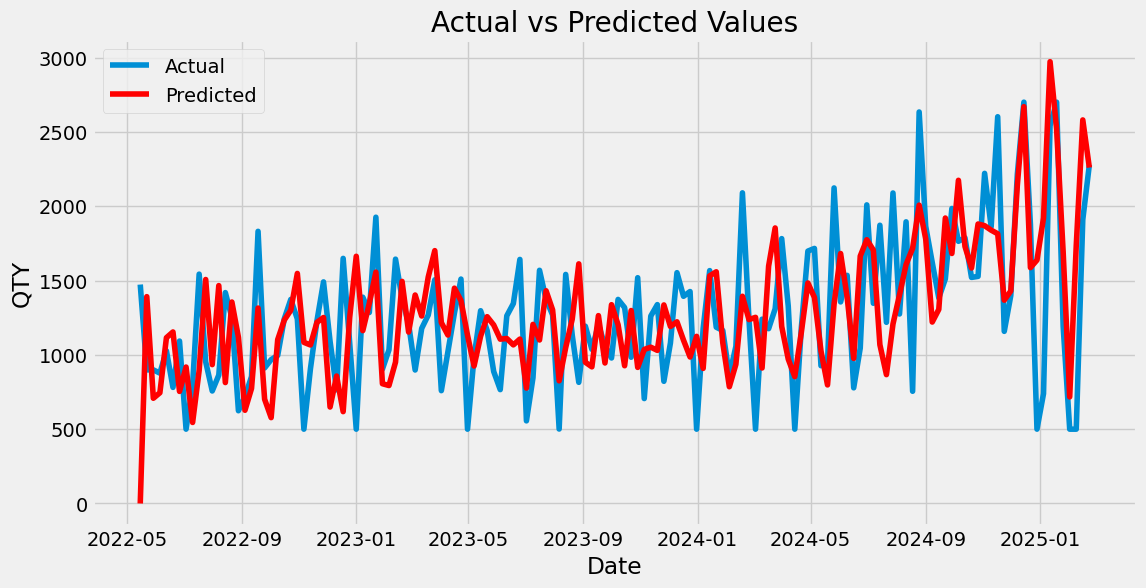

NRMSE: 0.19432306951403322
Model optimal. NRMSE di bawah threshold.


In [ ]:
# Generate predictions
predictions = smodel.predict_in_sample()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(dfami.index, dfami['QTY'], label='Actual')
plt.plot(dfami.index, predictions, label='Predicted', color='red')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('QTY')
plt.legend()
plt.grid(True)
plt.show()
# Calculate and print the mean of the 'QTY' column in dfami
mean_qty = dfami['QTY'].mean()

# Calculate RMSE
actual_values = dfami['QTY'][7:]
predicted_values = predictions[7:]
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

# Calculate NRMSE
nrmse = rmse / (dfami['QTY'].max() - dfami['QTY'].min())

print(f"NRMSE: {nrmse}")

# Check if NRMSE is less than a threshold (e.g., 0.2)
if nrmse < 0.2:
    print("Model optimal. NRMSE di bawah threshold.")
else:
    print("Model kurang optimal. NRMSE di atas threshold.")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


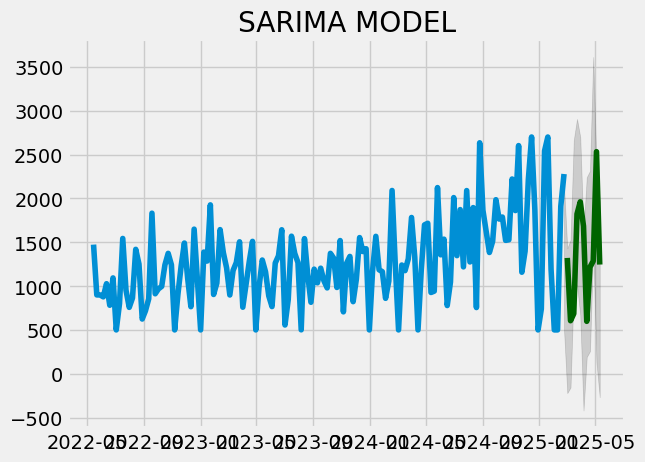

In [ ]:
n_periods = 12
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(dfami.index[-1], periods = n_periods, freq='W')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(dfami)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA MODEL")
plt.show()